In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Intoduction

### Diabetes is a health condition that affects how your body turns        
### food into energy.Most of the food you eat is broken down into
### sugar(also called glucose) and released into your bloodstream.
### When your blood sugar goes up,it signals your pancreas to release  insulin.


### Without ongoing,careful management,diabetes can lead to a builtup of sugars in the blood,which can increase the risk of dangerous complications,including stroke and heart disease.


### Objectives (1) Predict if person is diabetes patient or not (2) Find out most indicative features of diabetes

### importing dataframes

In [2]:
df=pd.read_csv("indian_diabetes_data_set.csv")#https://www.kaggle.com/datasets/aibuzz/pima-indians-diabetes-database/data

In [3]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

## Features

### 1. Pregnancies: Number of times pregnant.
### 2.Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test.
### 3.BloodPressure: Diastolic blood pressure (mm Hg).
### 4.SkinThickness: Triceps skinfold thickness (mm).
### 5.Insulin: 2-Hour serum insulin (mu U/ml).
### 6.BMI: Body mass index (weight in kg / height in m^2).
### 7.DiabetesPedigreeFunction: Diabetes pedigree function, a genetic score of diabetes.
### 8.Age: Age in years.
### 9.Outcome: Binary classification indicating the presence (1) or absence (0) of diabetes.

In [4]:
df.shape

(768, 9)

In [5]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [6]:
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [9]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [12]:
# define numerical and categorical features
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print column
#print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))

#print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

In [13]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### Iobserved that there is no missing values in dataset however the features like Glucose,BloodPressure,Insulin,SkinThickness,has 0 values which is not possible.We have to replace 0 values with either mean or median values of specific column



In [14]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())

In [15]:
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0             35     30.5  33.6   
1            1     85.0           66.0             29     30.5  26.6   
2            8    183.0           64.0             23     30.5  23.3   
3            1     89.0           66.0             23     94.0  28.1   
4            0    137.0           40.0             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [16]:
df.duplicated().sum()# use to count the number of duplicate rows

0

In [17]:
print("{:.3}% of rows are duplicated.".format(df.duplicated().sum() / df.shape[0] * 100))

0.0% of rows are duplicated.


In [18]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                50
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [19]:
# Rename columns to lowercase
clean_df = df.copy()
clean_df.columns = clean_df.columns.str.lower()# converts all the columns names to lower case
clean_df.rename(columns={"diabetespedigreefunction": "pedigree", "outcome": "has_diabete"}, inplace=True)# renames specific columns
clean_df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'pedigree', 'age', 'has_diabete'],
      dtype='object')

In [20]:
df1=clean_df.copy()

In [21]:
df1.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'pedigree', 'age', 'has_diabete'],
      dtype='object')

In [22]:
#check for zero variance and near zero variance features
df1.var()==0
#df1.var() computes the variance for each column in the DataFrame df1. Variance is a statistical measure that quantifies how much the values in a dataset vary from the mean (average). In this case, it calculates the variance for each column in the DataFrame.

#df1.var() == 0 checks whether the computed variances are equal to zero for each column. It returns a Boolean Series where each element is True if the variance of that column is zero and False otherwise.

#So, df1.var() == 0 helps you identify columns in the DataFrame where all the values are the same (i.e., there is no variation). This information can be useful in data analysis to detect columns that may not provide much information or may need further handling, such as removing them from the dataset to reduce redundancy

pregnancies      False
glucose          False
bloodpressure    False
skinthickness    False
insulin          False
bmi              False
pedigree         False
age              False
has_diabete      False
dtype: bool

### there is no zero variance and near zero variance features

## handling outliers

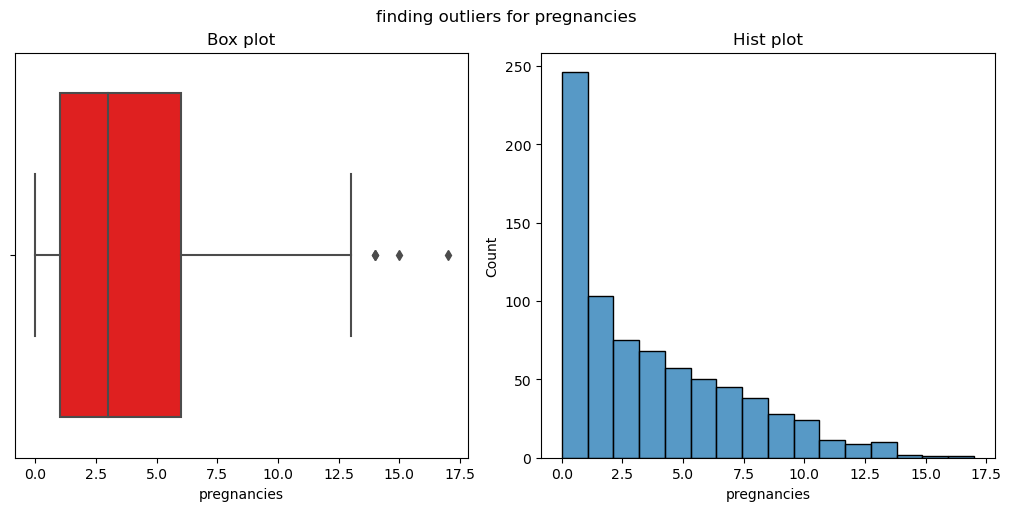

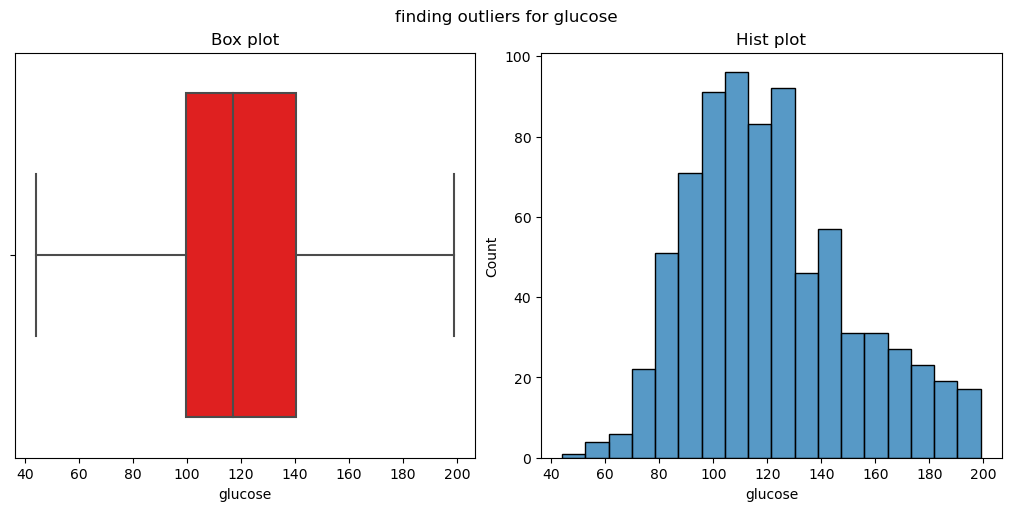

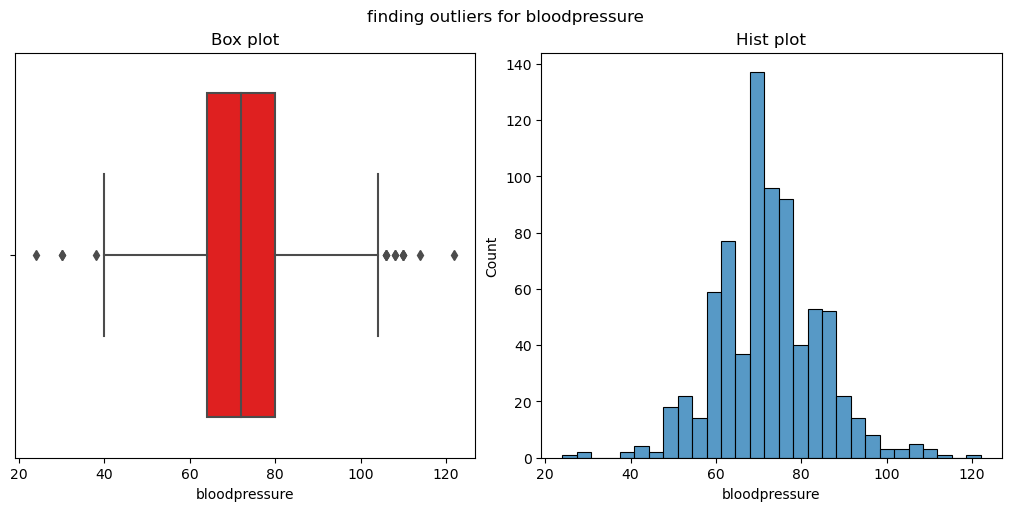

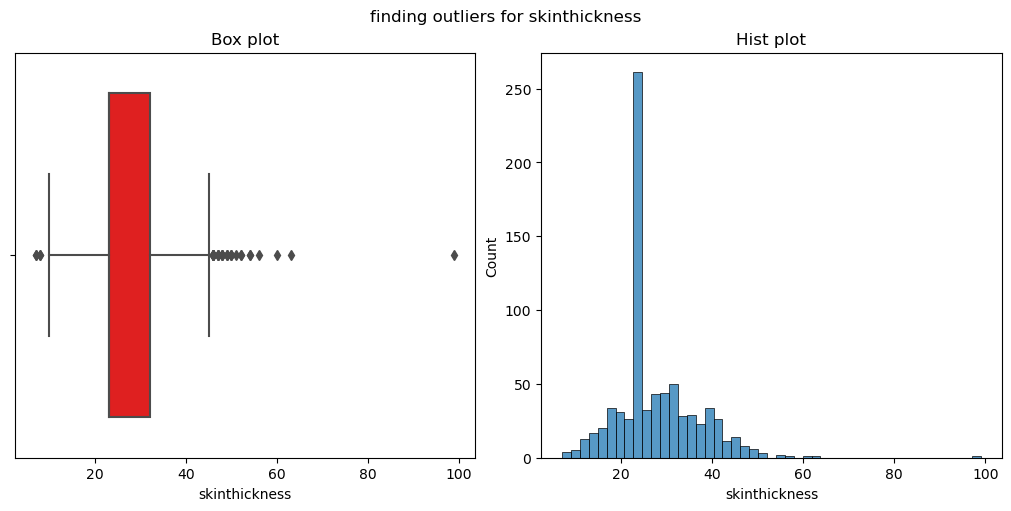

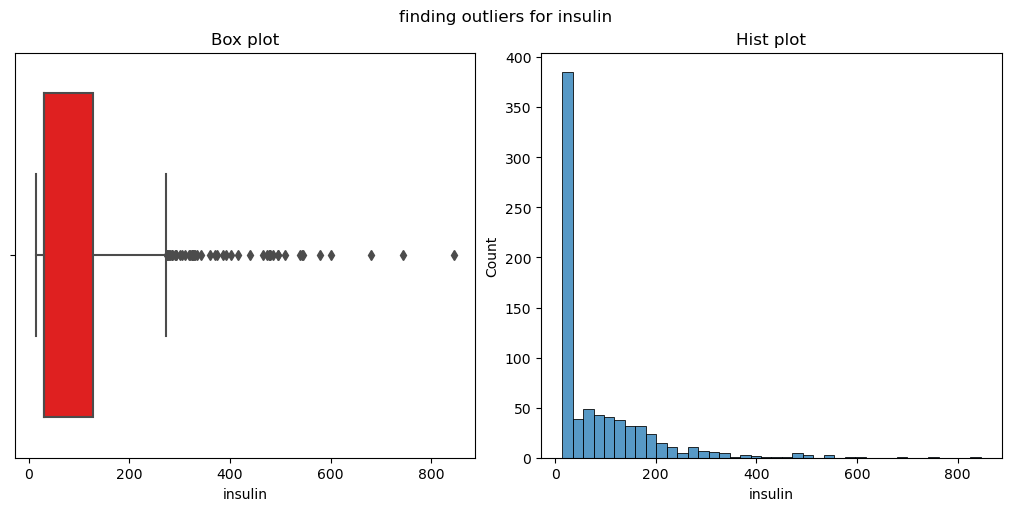

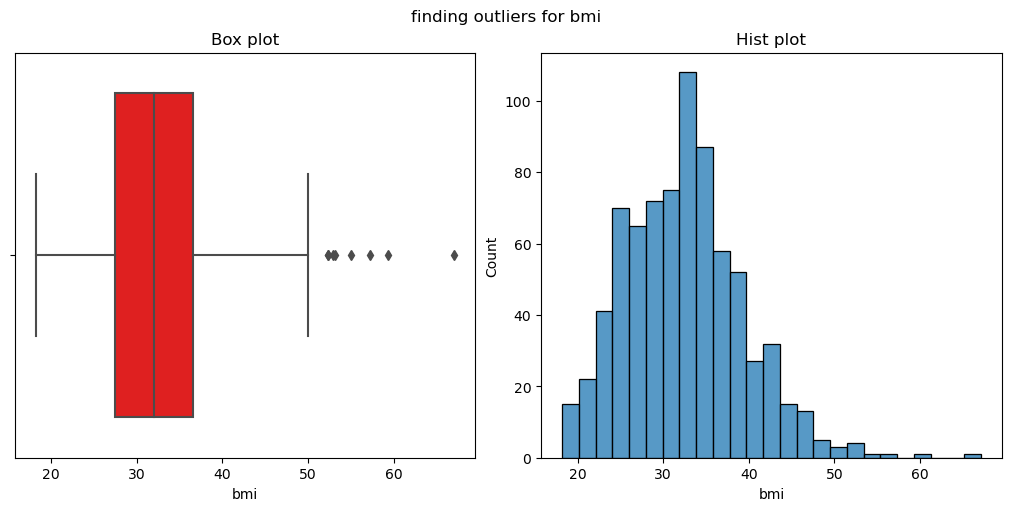

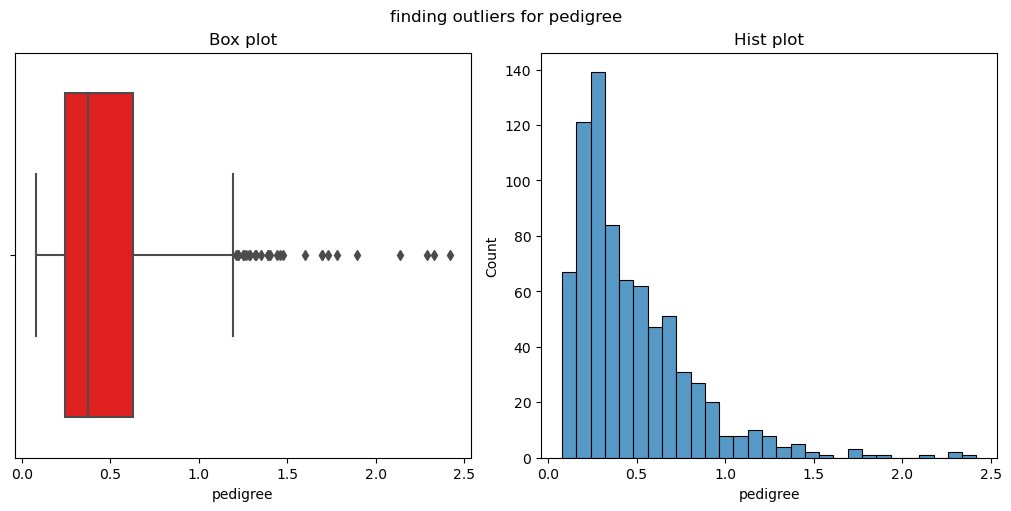

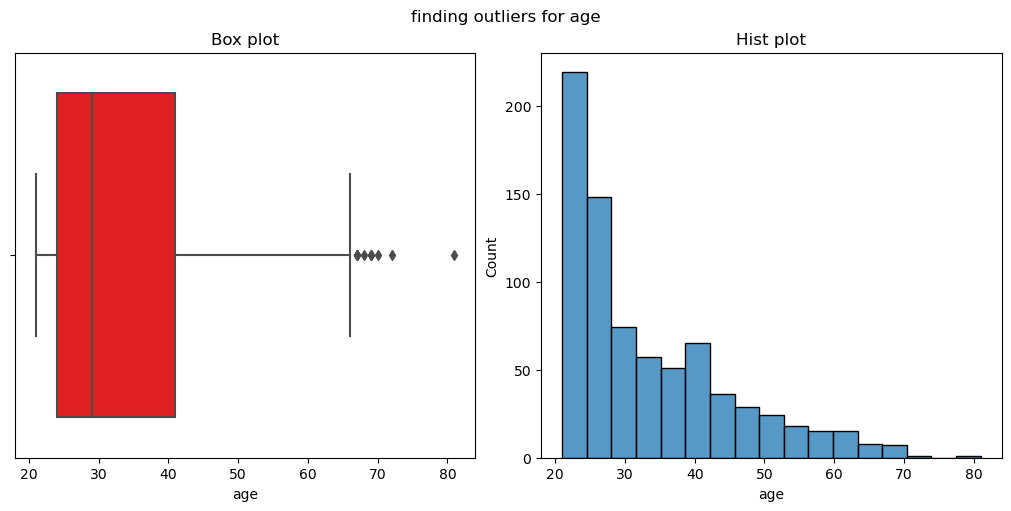

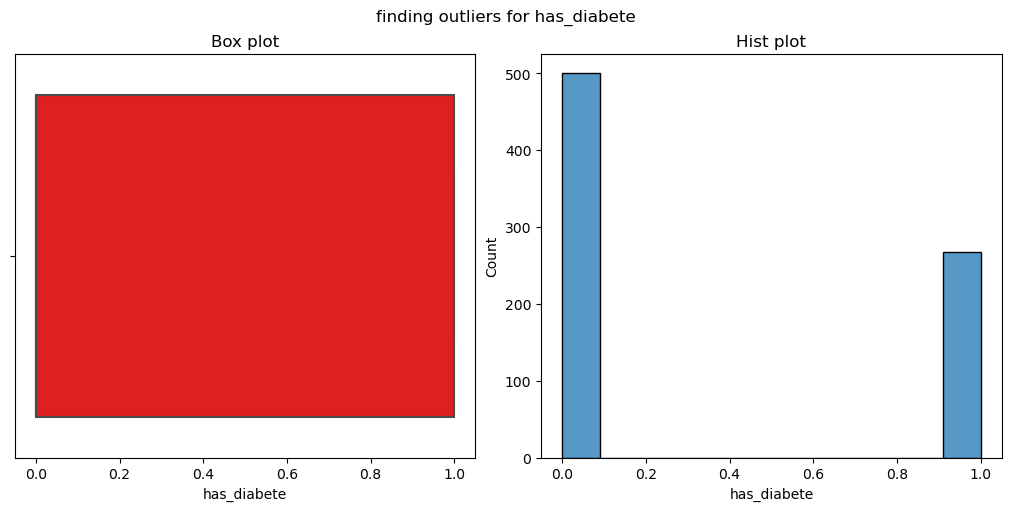

In [23]:
def plot_outliers():
    for col_name in df1.columns:
        fig, ax = plt.subplots(1,2, constrained_layout=True)
        fig.set_size_inches(10,5)
        sns.boxplot(data=df1, x=col_name, ax=ax[0],color='r').set(title="Box plot")
        sns.histplot(data=df1, x=col_name, ax=ax[1]).set(title="Hist plot")   
        plt.suptitle("finding outliers for {}".format(col_name))
        plt.show()

plot_outliers()

### Except glucose and has_diabetes others features contains outliers
### insulin,bmi,pedigree have many outliers
### dataset become very small if we try to remove outliers,so we will replace outliers with appropriate value(lower or upper)

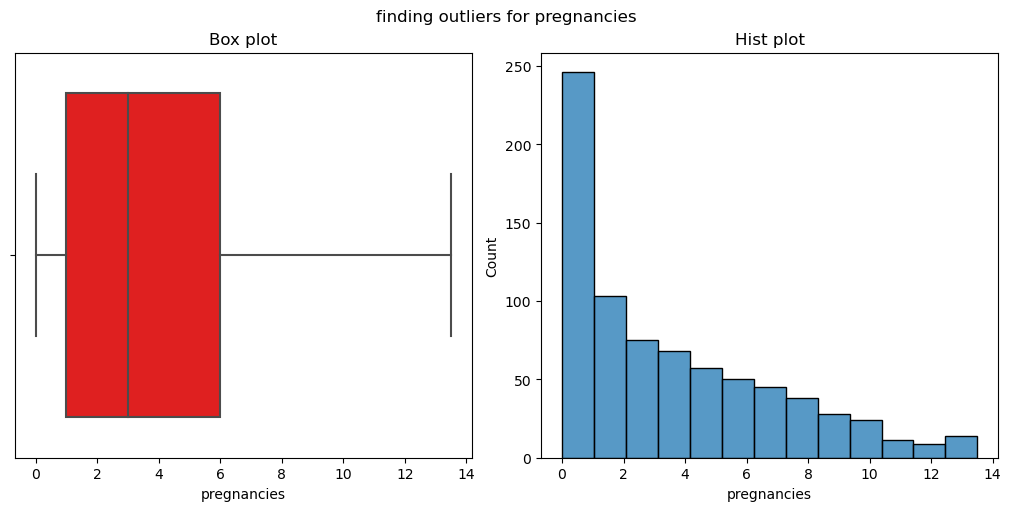

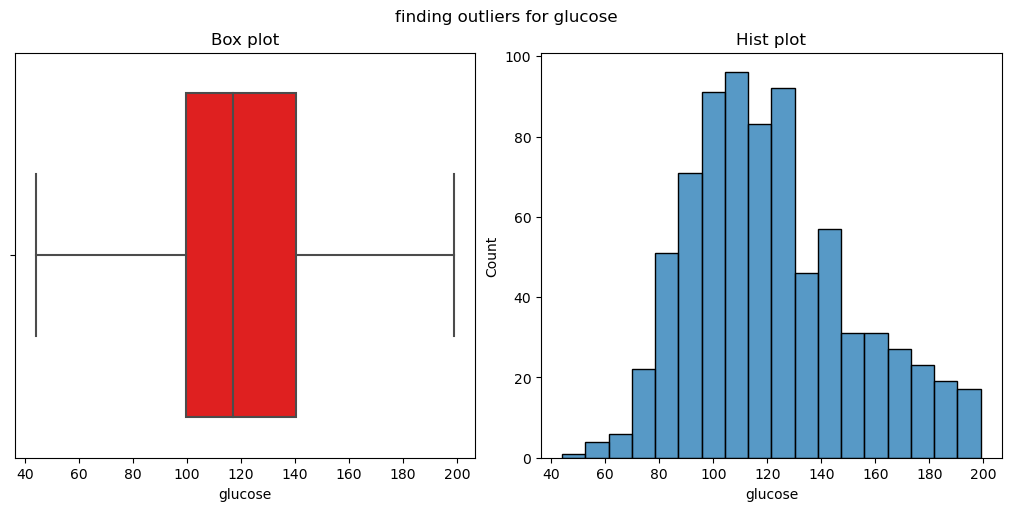

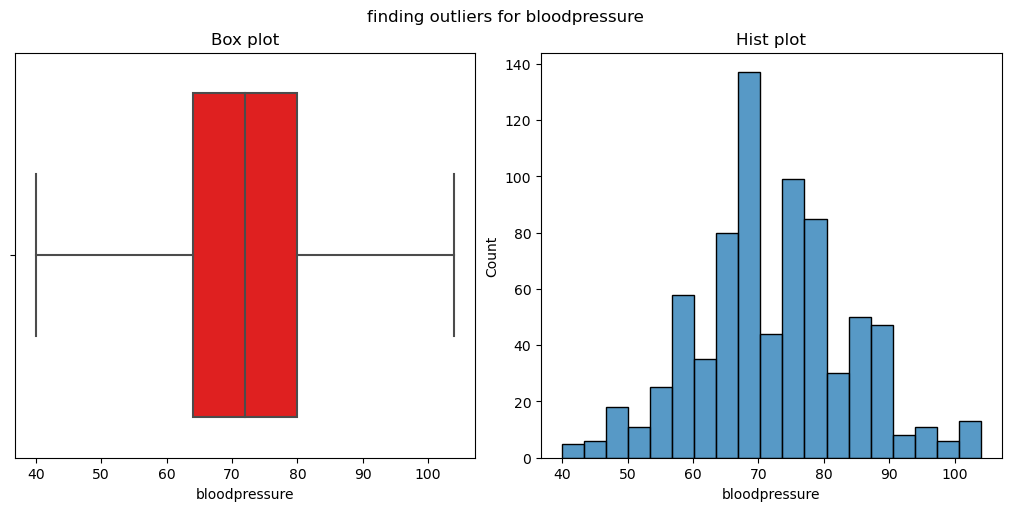

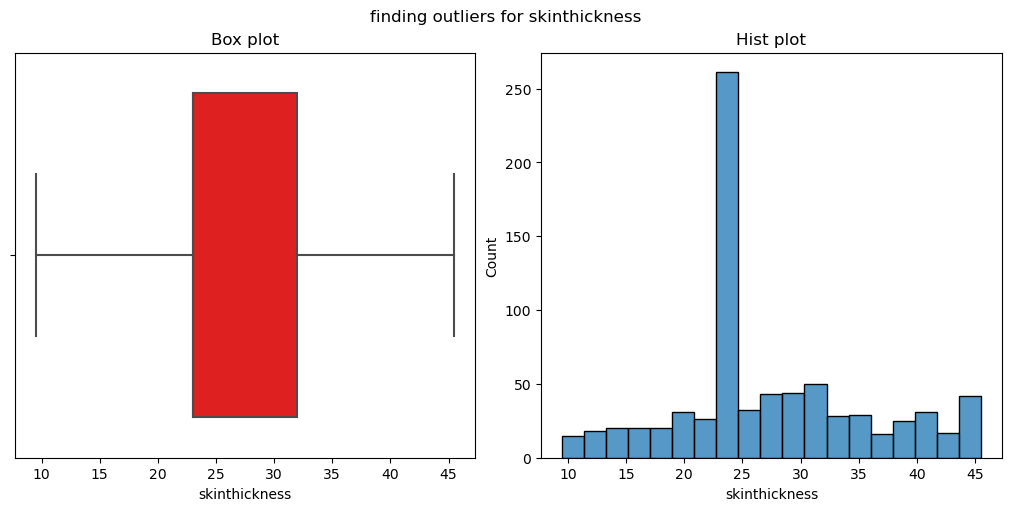

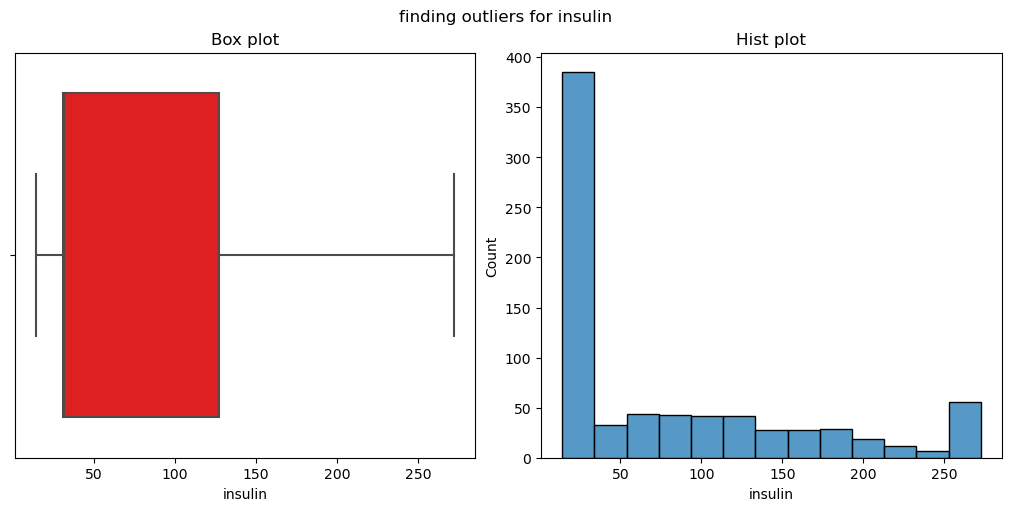

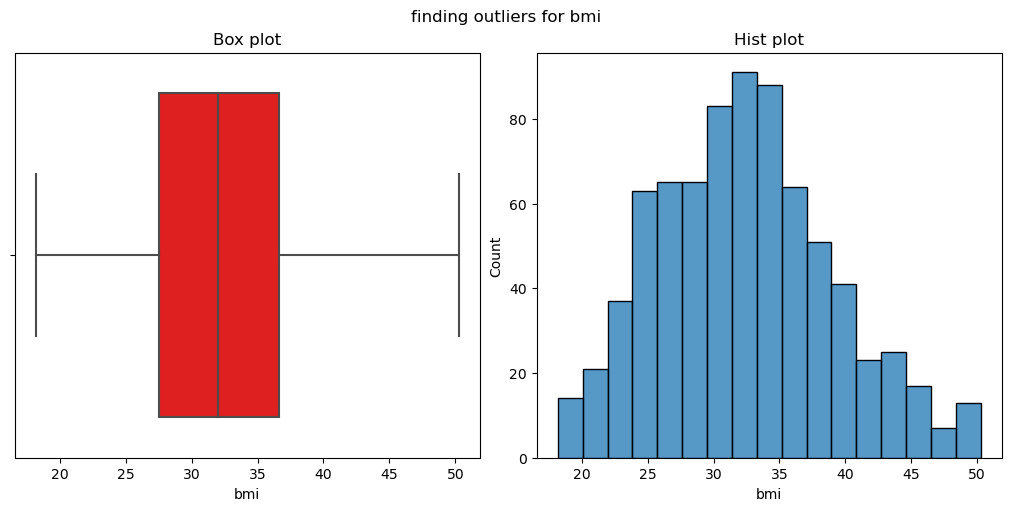

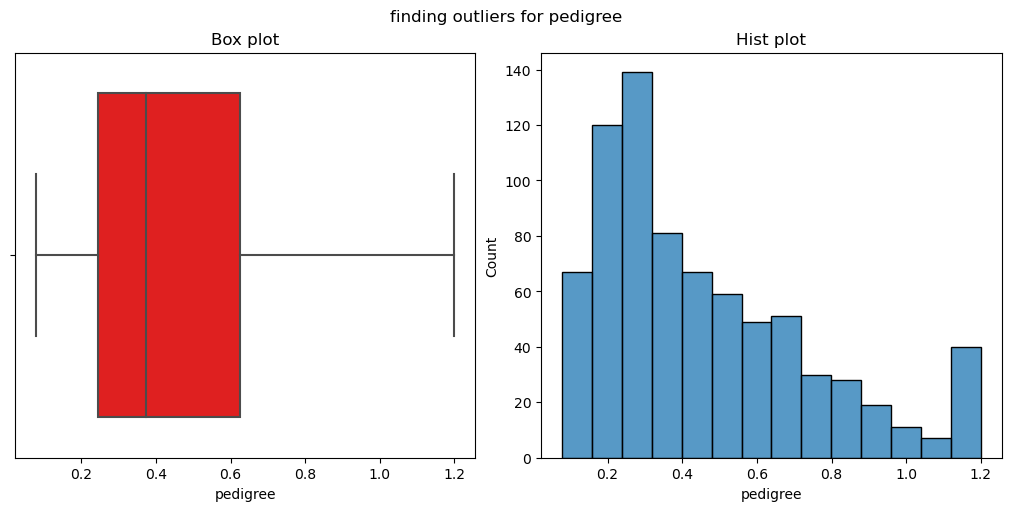

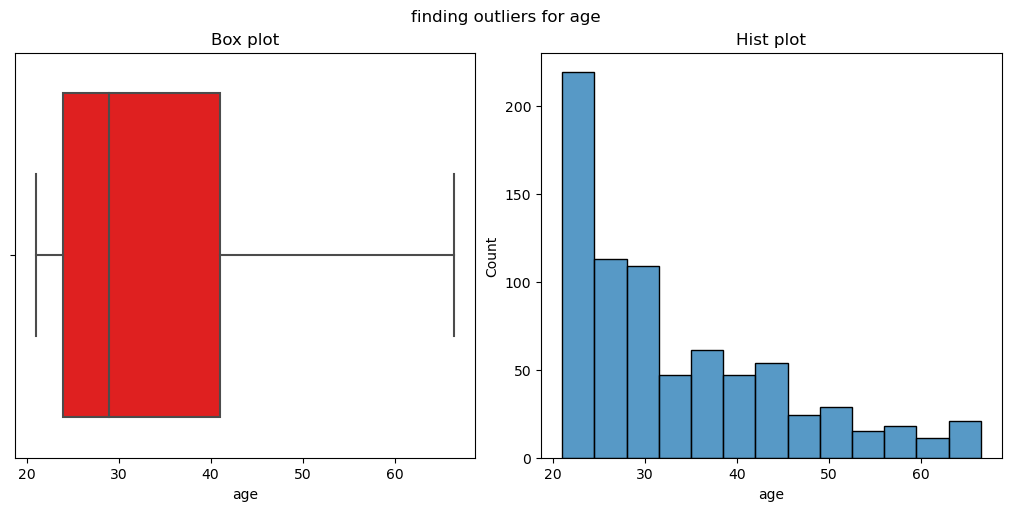

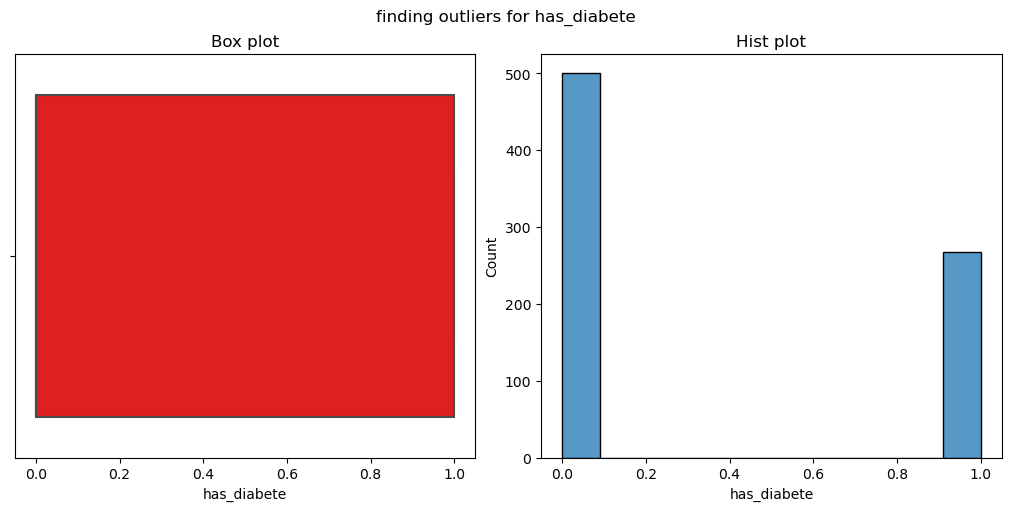

In [24]:
#handling outliers using IQR method

def handling_outliers(threshold = 1.5):
    for col_name in df1.columns:
        q1 = df1[col_name].quantile(0.25)
        q3 = df1[col_name].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - threshold*iqr
        upper = q3 + threshold*iqr
        
        #replace outliers with uppper or lower
        
        df1[col_name] = np.where(df1[col_name] > upper, upper, np.where(df1[col_name] < lower, lower, df1[col_name]))
        
handling_outliers()
plot_outliers()

In [25]:
df2=df1.copy()

In [26]:
df2['has_diabete'].value_counts()

0.0    500
1.0    268
Name: has_diabete, dtype: int64

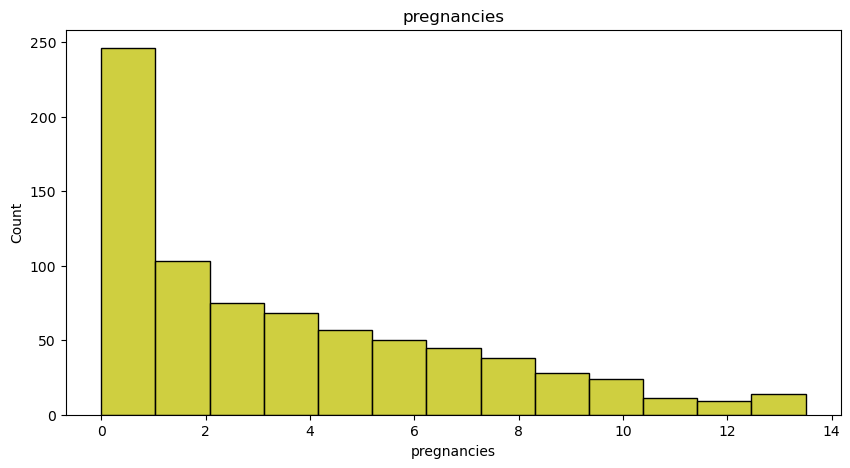

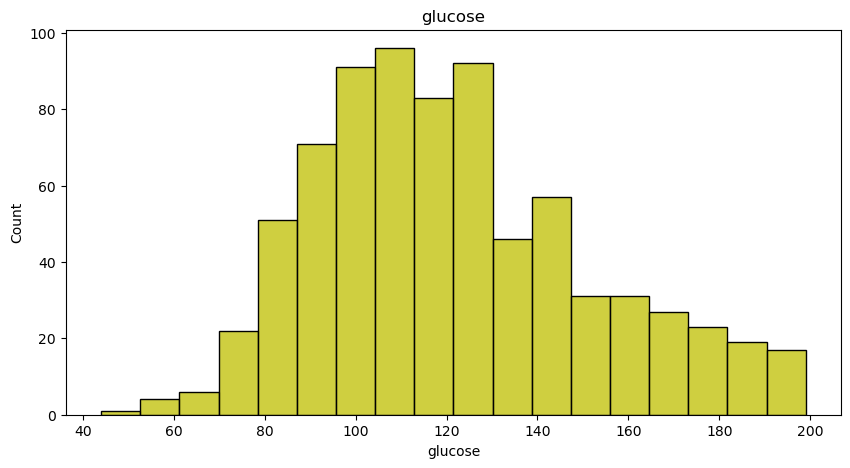

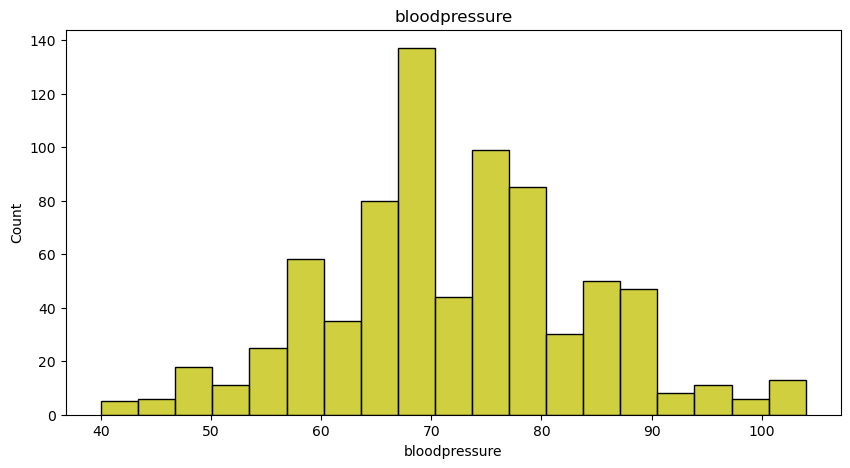

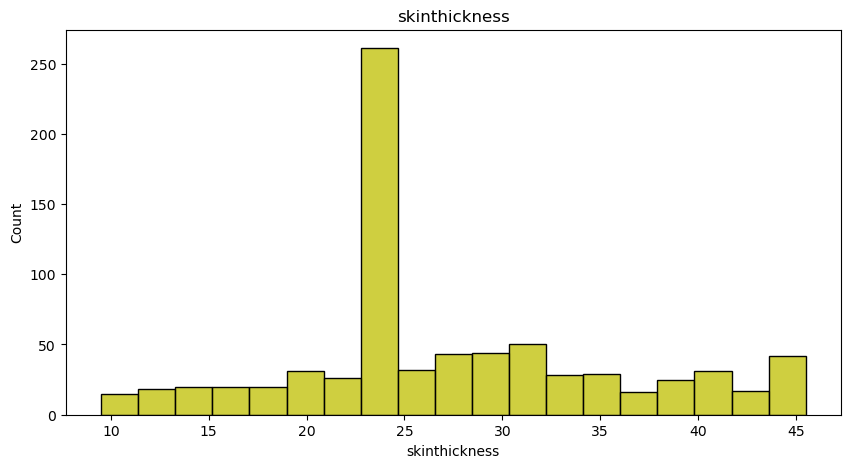

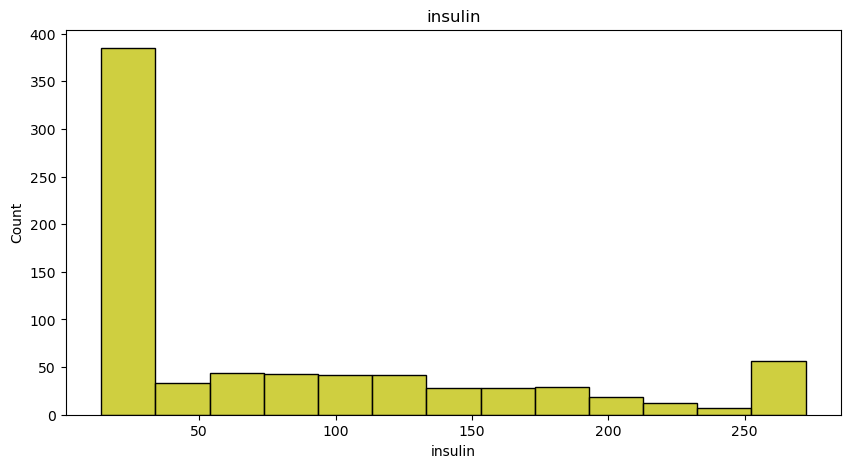

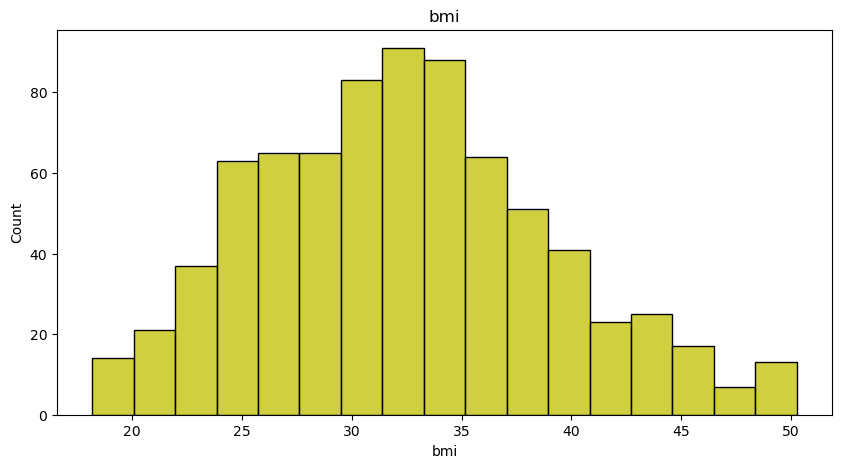

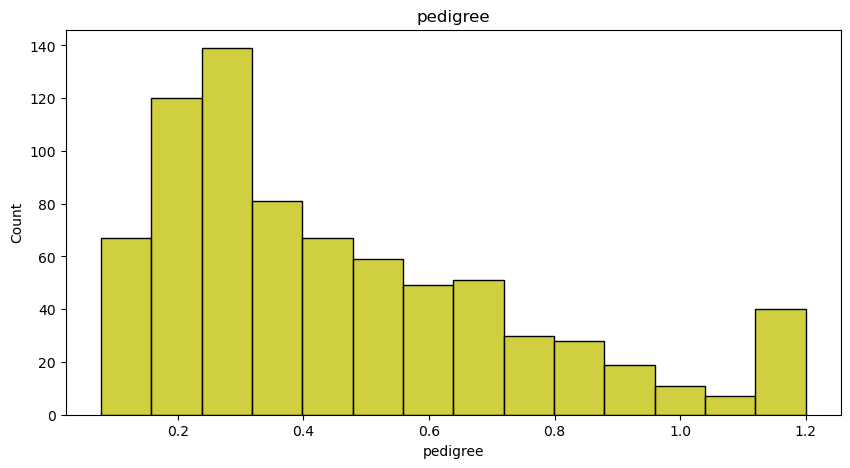

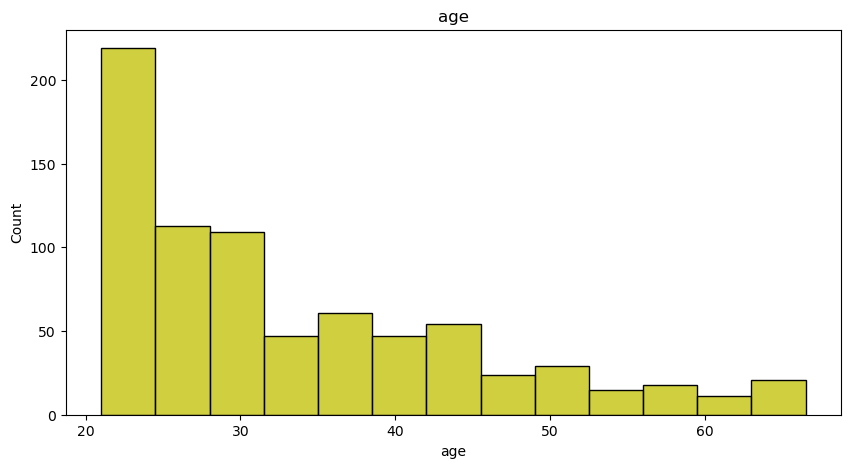

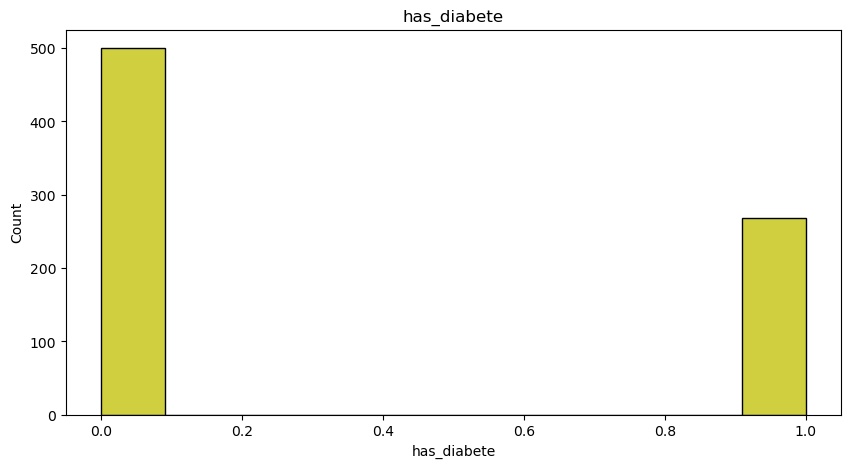

In [27]:
#feature distribution
for col_name in df2.columns:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df2, x=col_name,color='y').set(title=col_name)

### Observation:-glucose,bloddpressure and bmi seem have normal distribution-Most of the person are between 21 and 30 years old

In [28]:
df2_corr = df2.corr()
df2_corr

pregnancies   glucose  bloodpressure  skinthickness   insulin  \
pregnancies       1.000000  0.126606       0.211257       0.047563 -0.061192   
glucose           0.126606  1.000000       0.220946       0.162287  0.337830   
bloodpressure     0.211257  0.220946       1.000000       0.164741 -0.025568   
skinthickness     0.047563  0.162287       0.164741       1.000000  0.285411   
insulin          -0.061192  0.337830      -0.025568       0.285411  1.000000   
bmi               0.027144  0.234041       0.286508       0.562506  0.207484   
pedigree         -0.017398  0.118236       0.015067       0.118426  0.191870   
age               0.549695  0.268602       0.334903       0.045434 -0.040448   
has_diabete       0.220392  0.492908       0.166131       0.191333  0.147295   

                    bmi  pedigree       age  has_diabete  
pregnancies    0.027144 -0.017398  0.549695     0.220392  
glucose        0.234041  0.118236  0.268602     0.492908  
bloodpressure  0.286508  0.015067  0.334903     0.166131  
skinthickness  0.562506  0.118426  0.045434     0.191333  
insulin        0.207484  0.191870 -0.040448     0.147295  
bmi            1.000000  0.138545  0.035865     0.313035  
pedigree       0.138545  1.000000  0.047289     0.184969  
age            0.035865  0.047289  1.000000     0.242702  
has_diabete    0.313035  0.184969  0.242702     1.000000

### the correalation between features are very slow-the highest correlation is 0.56 between BMI and Glucose-it's normal to see correlation between age and pregnancies even if correation is small 0.55

In [29]:
#relation between target and feature
df2_corr["has_diabete"]

pregnancies      0.220392
glucose          0.492908
bloodpressure    0.166131
skinthickness    0.191333
insulin          0.147295
bmi              0.313035
pedigree         0.184969
age              0.242702
has_diabete      1.000000
Name: has_diabete, dtype: float64

In [30]:
df_positive = df2.query('has_diabete == 1')
df_negative = df2.query('has_diabete == 0')

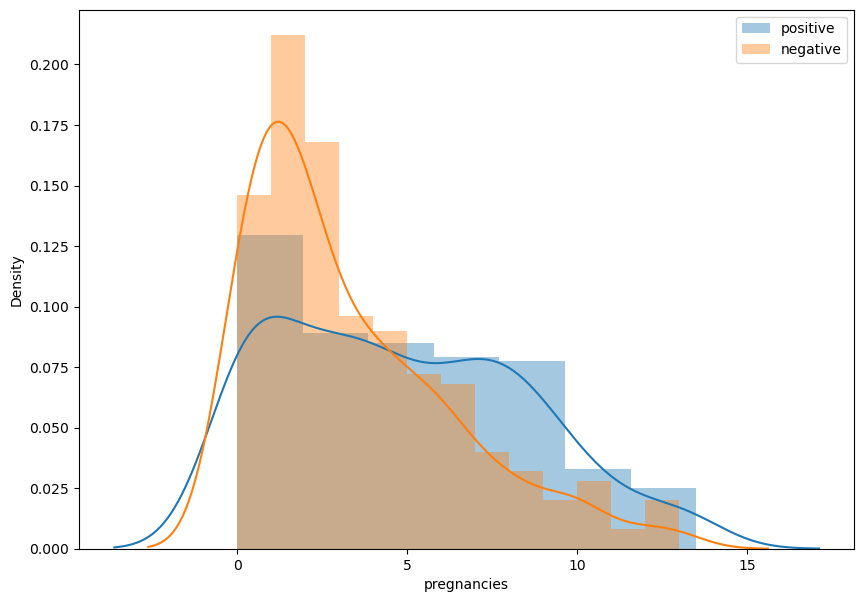

In [31]:
plt.figure(figsize=(10,7))
sns.distplot(df_positive['pregnancies'], label="positive")    
sns.distplot(df_negative['pregnancies'], label="negative")
plt.legend()
plt.show()

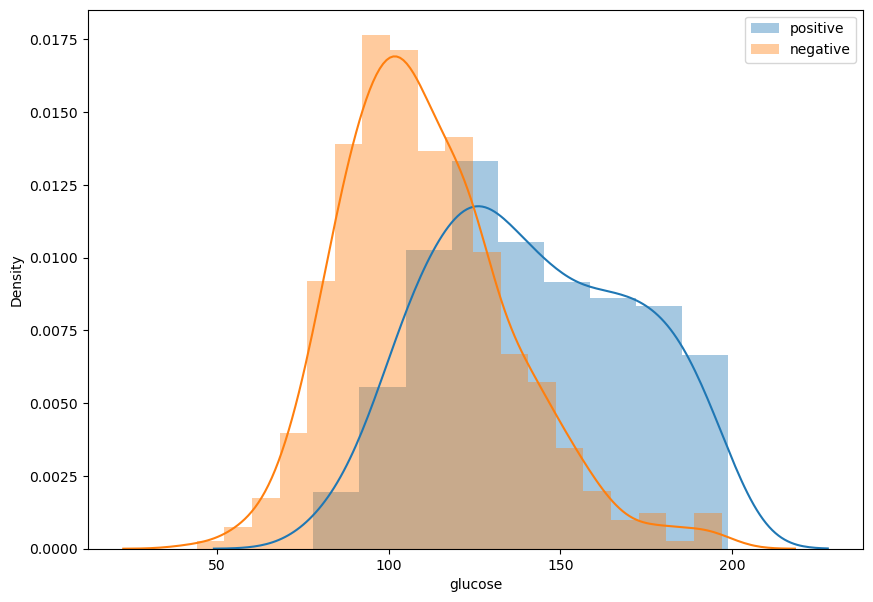

In [32]:
plt.figure(figsize=(10,7))
sns.distplot(df_positive['glucose'], label="positive")    
sns.distplot(df_negative['glucose'], label="negative")
plt.legend()
plt.show()

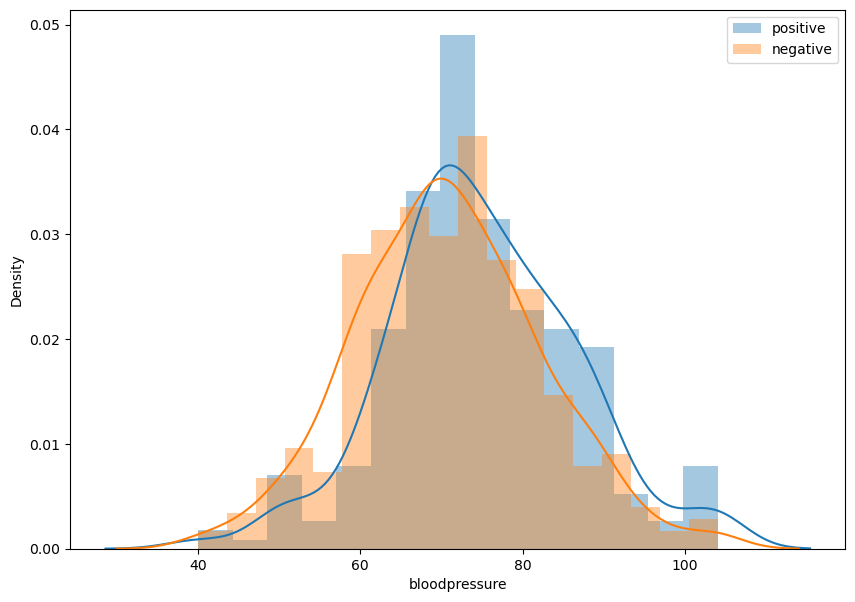

In [33]:
plt.figure(figsize=(10,7))
sns.distplot(df_positive['bloodpressure'], label="positive")    
sns.distplot(df_negative['bloodpressure'], label="negative")
plt.legend()
plt.show()

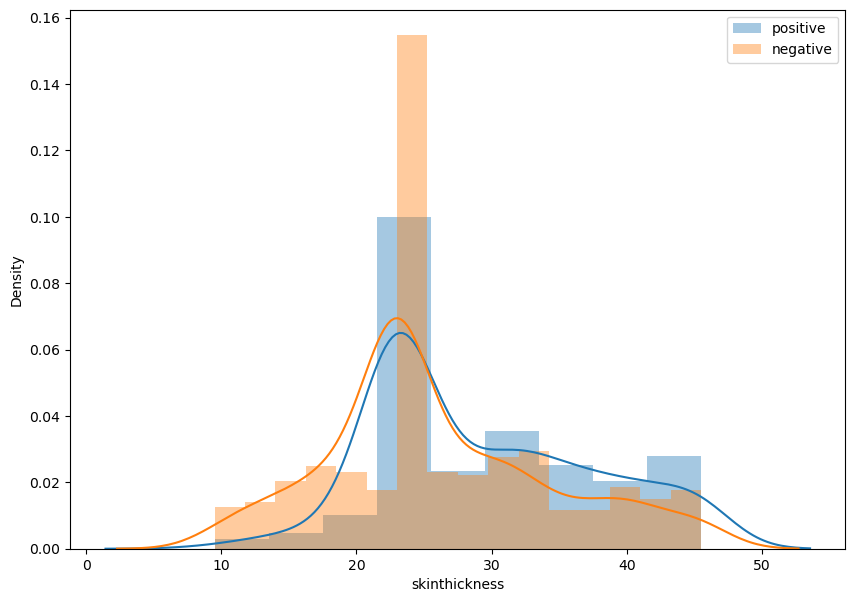

In [34]:
plt.figure(figsize=(10,7))
sns.distplot(df_positive['skinthickness'], label="positive")    
sns.distplot(df_negative['skinthickness'], label="negative")
plt.legend()
plt.show()

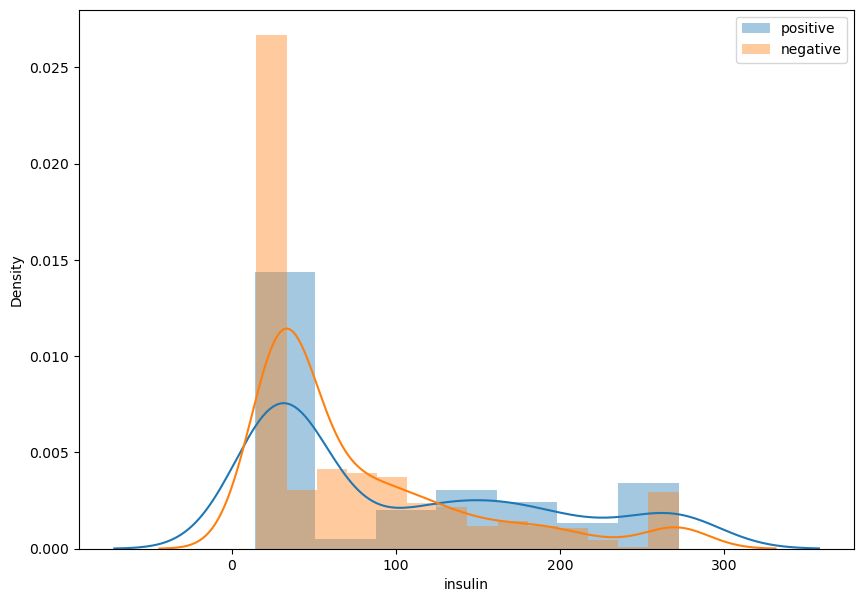

In [35]:
plt.figure(figsize=(10,7))
sns.distplot(df_positive['insulin'], label="positive")    
sns.distplot(df_negative['insulin'], label="negative")
plt.legend()
plt.show()

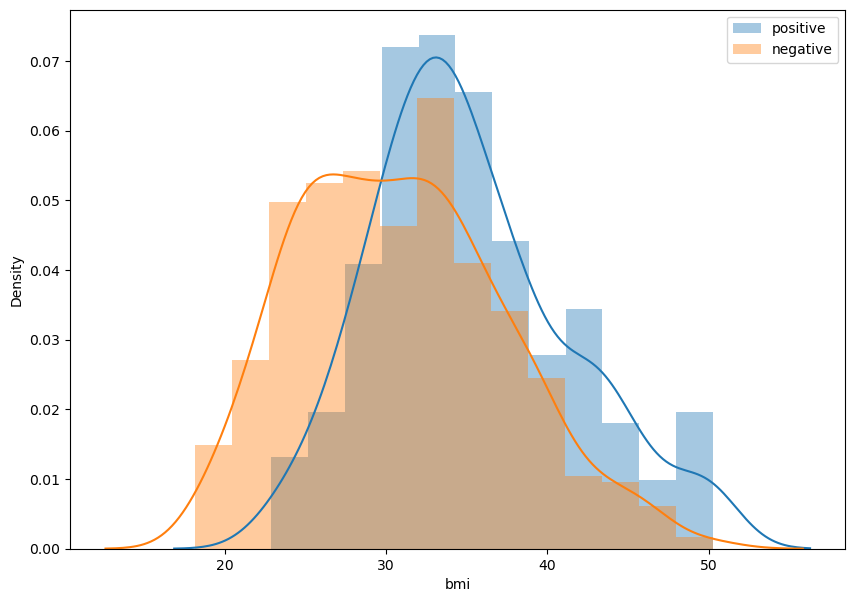

In [36]:
plt.figure(figsize=(10,7))
sns.distplot(df_positive['bmi'], label="positive")    
sns.distplot(df_negative['bmi'], label="negative")
plt.legend()
plt.show()

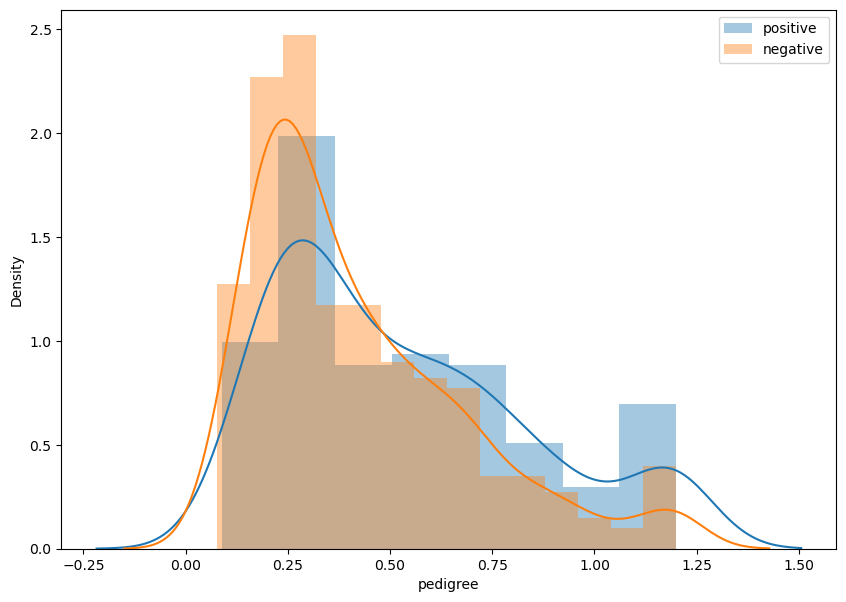

In [37]:
plt.figure(figsize=(10,7))
sns.distplot(df_positive['pedigree'], label="positive")    
sns.distplot(df_negative['pedigree'], label="negative")
plt.legend()
plt.show()

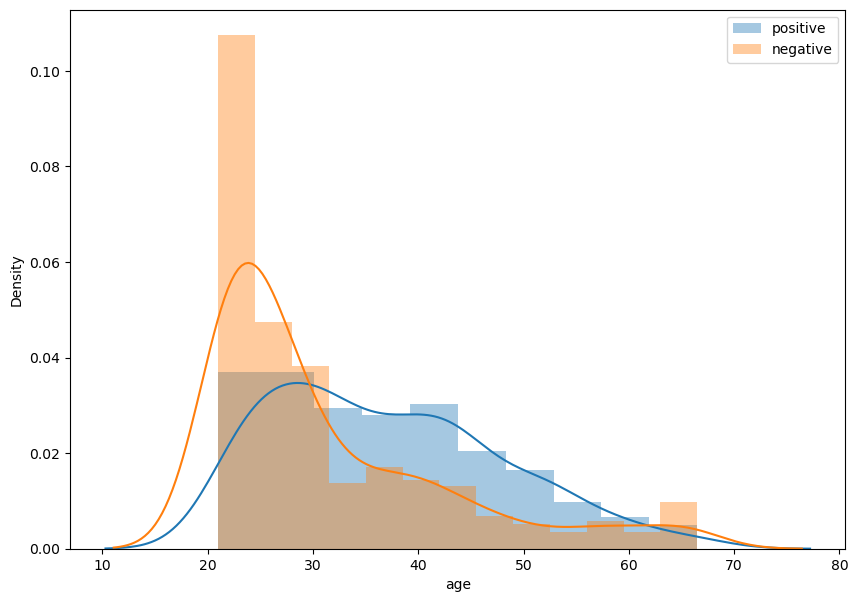

In [38]:
plt.figure(figsize=(10,7))
sns.distplot(df_positive['age'], label="positive")    
sns.distplot(df_negative['age'], label="negative")
plt.legend()
plt.show()

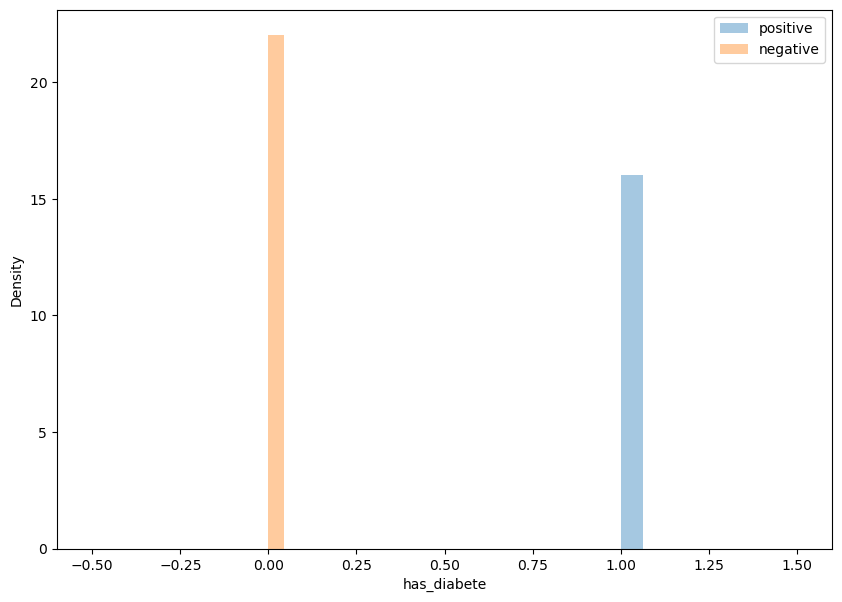

In [39]:
plt.figure(figsize=(10,7))
sns.distplot(df_positive['has_diabete'], label="positive")    
sns.distplot(df_negative['has_diabete'], label="negative")
plt.legend()
plt.show()

In [40]:
df2.groupby('has_diabete').mean()

pregnancies     glucose  bloodpressure  skinthickness  \
has_diabete                                                          
0.0             3.298000  110.705367      70.802008      25.934000   
1.0             4.843284  142.159661      74.883162      29.322761   

                insulin        bmi  pedigree        age  
has_diabete                                              
0.0           77.918500  30.861866  0.420264  31.135000  
1.0          101.478078  35.238004  0.531022  37.052239

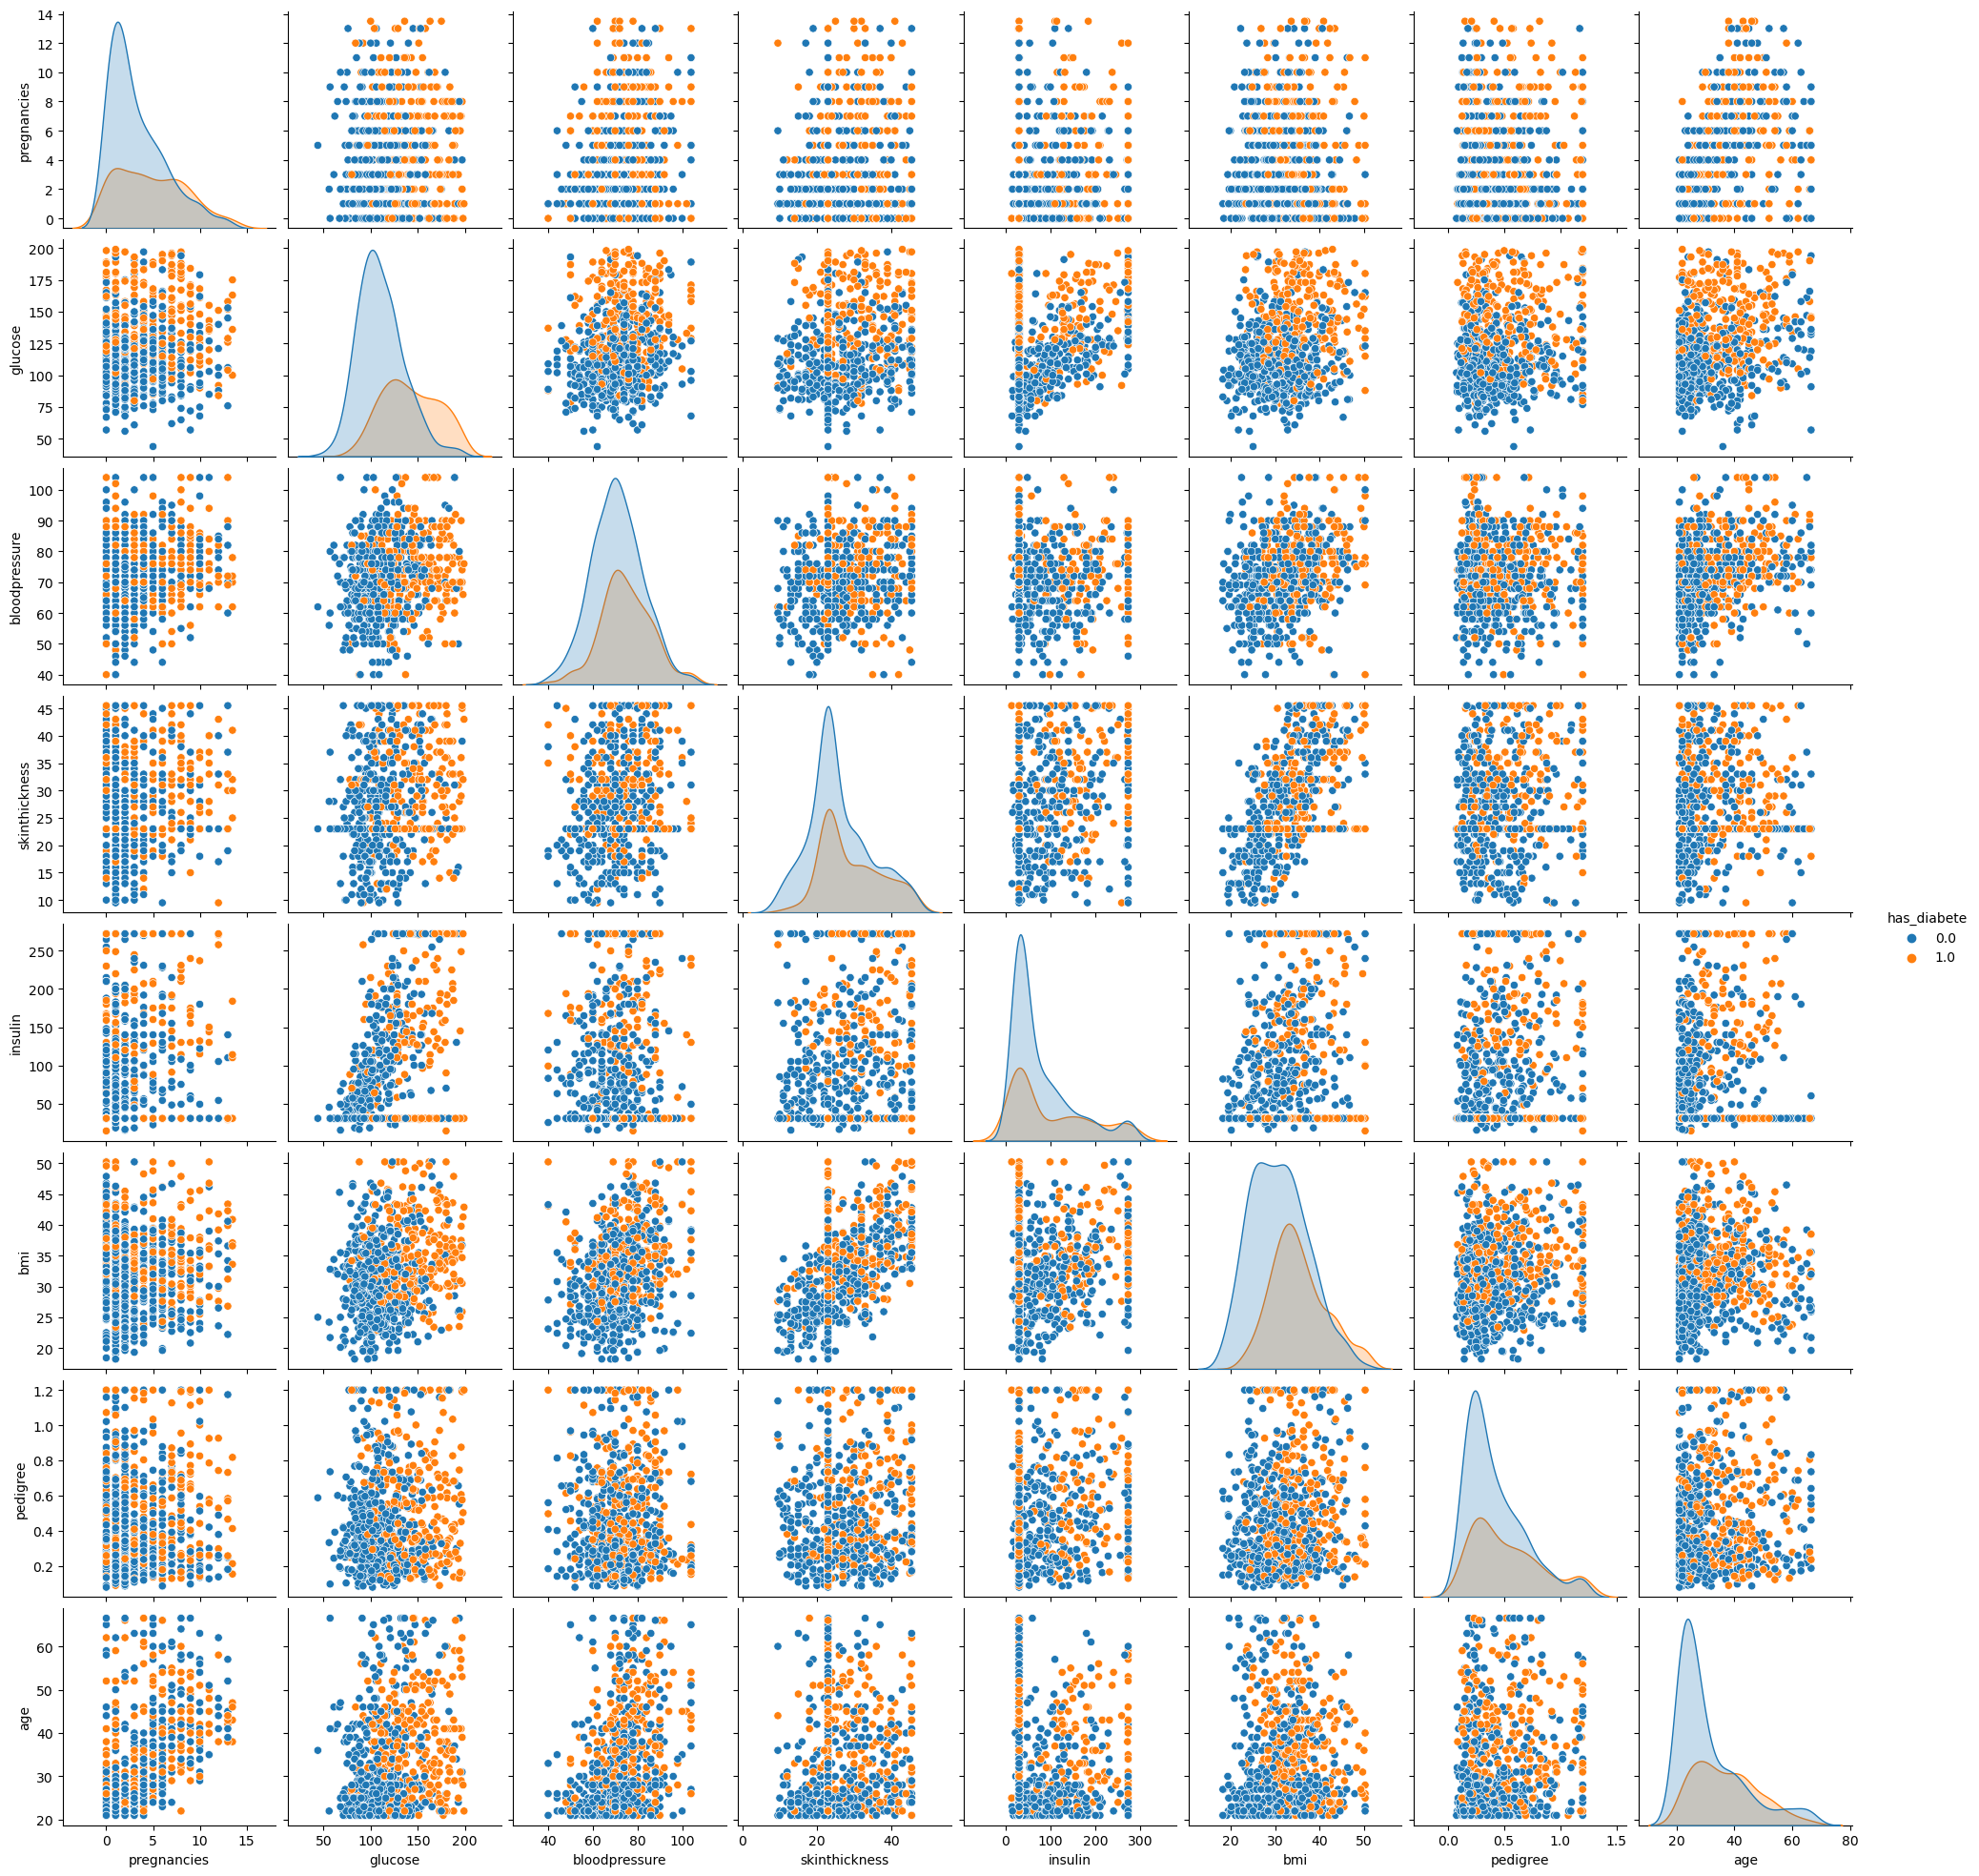

In [41]:
sns.pairplot(df2, hue="has_diabete")
plt.show()

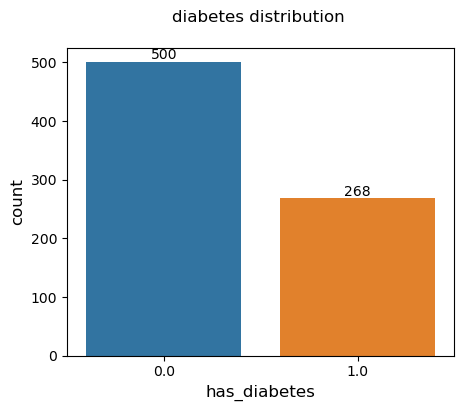

In [42]:
plt.figure(figsize=(5,4))
ax=sns.barplot(x=df2['has_diabete'].value_counts().index,y=df2['has_diabete'].value_counts())
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('has_diabetes',size=12)
plt.ylabel('count',size=12)
plt.title("diabetes distribution \n",size=12)
plt.show()

### In this above graph 0 means don't have diabetes and 1 means have diabetes
### we can observe that there is more people don't have diabetes
### 500 people don't have diabetes
### 268 people have diabetes

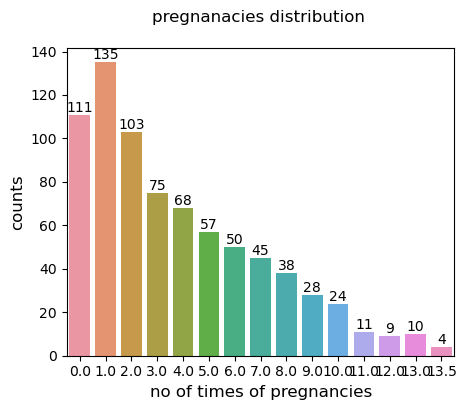

In [43]:
plt.figure(figsize=(5,4))
ax=sns.barplot(x=df2['pregnancies'].value_counts().index,y=df2['pregnancies'].value_counts())
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('no of times of pregnancies',size=12)
plt.ylabel('counts',size=12)
plt.title("pregnanacies distribution \n",size=12)
plt.show()

### the above graph represents people got No.of times pregnancies
### (1) the pregnancies range from 14
### (2) people who get the pregnancies 1 times are higher than compare to the remaining
### (3) 111 people didn't got pregnancies

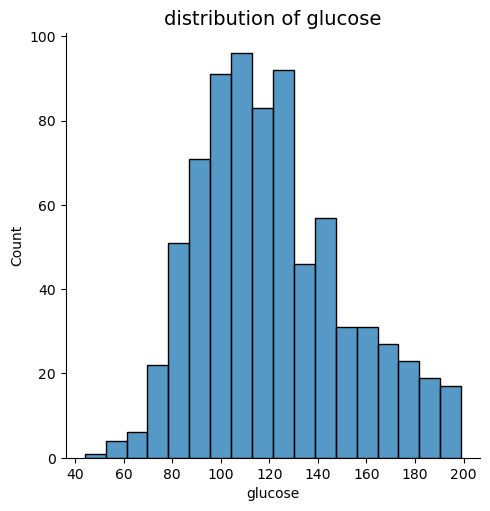

In [44]:
sns.displot(df2,x='glucose')
plt.title("distribution of glucose",size=14)
plt.show()

## Insights:
### 1. glucose range from 40 to 200
### 2. most of the people had glucose level from 90 to 130

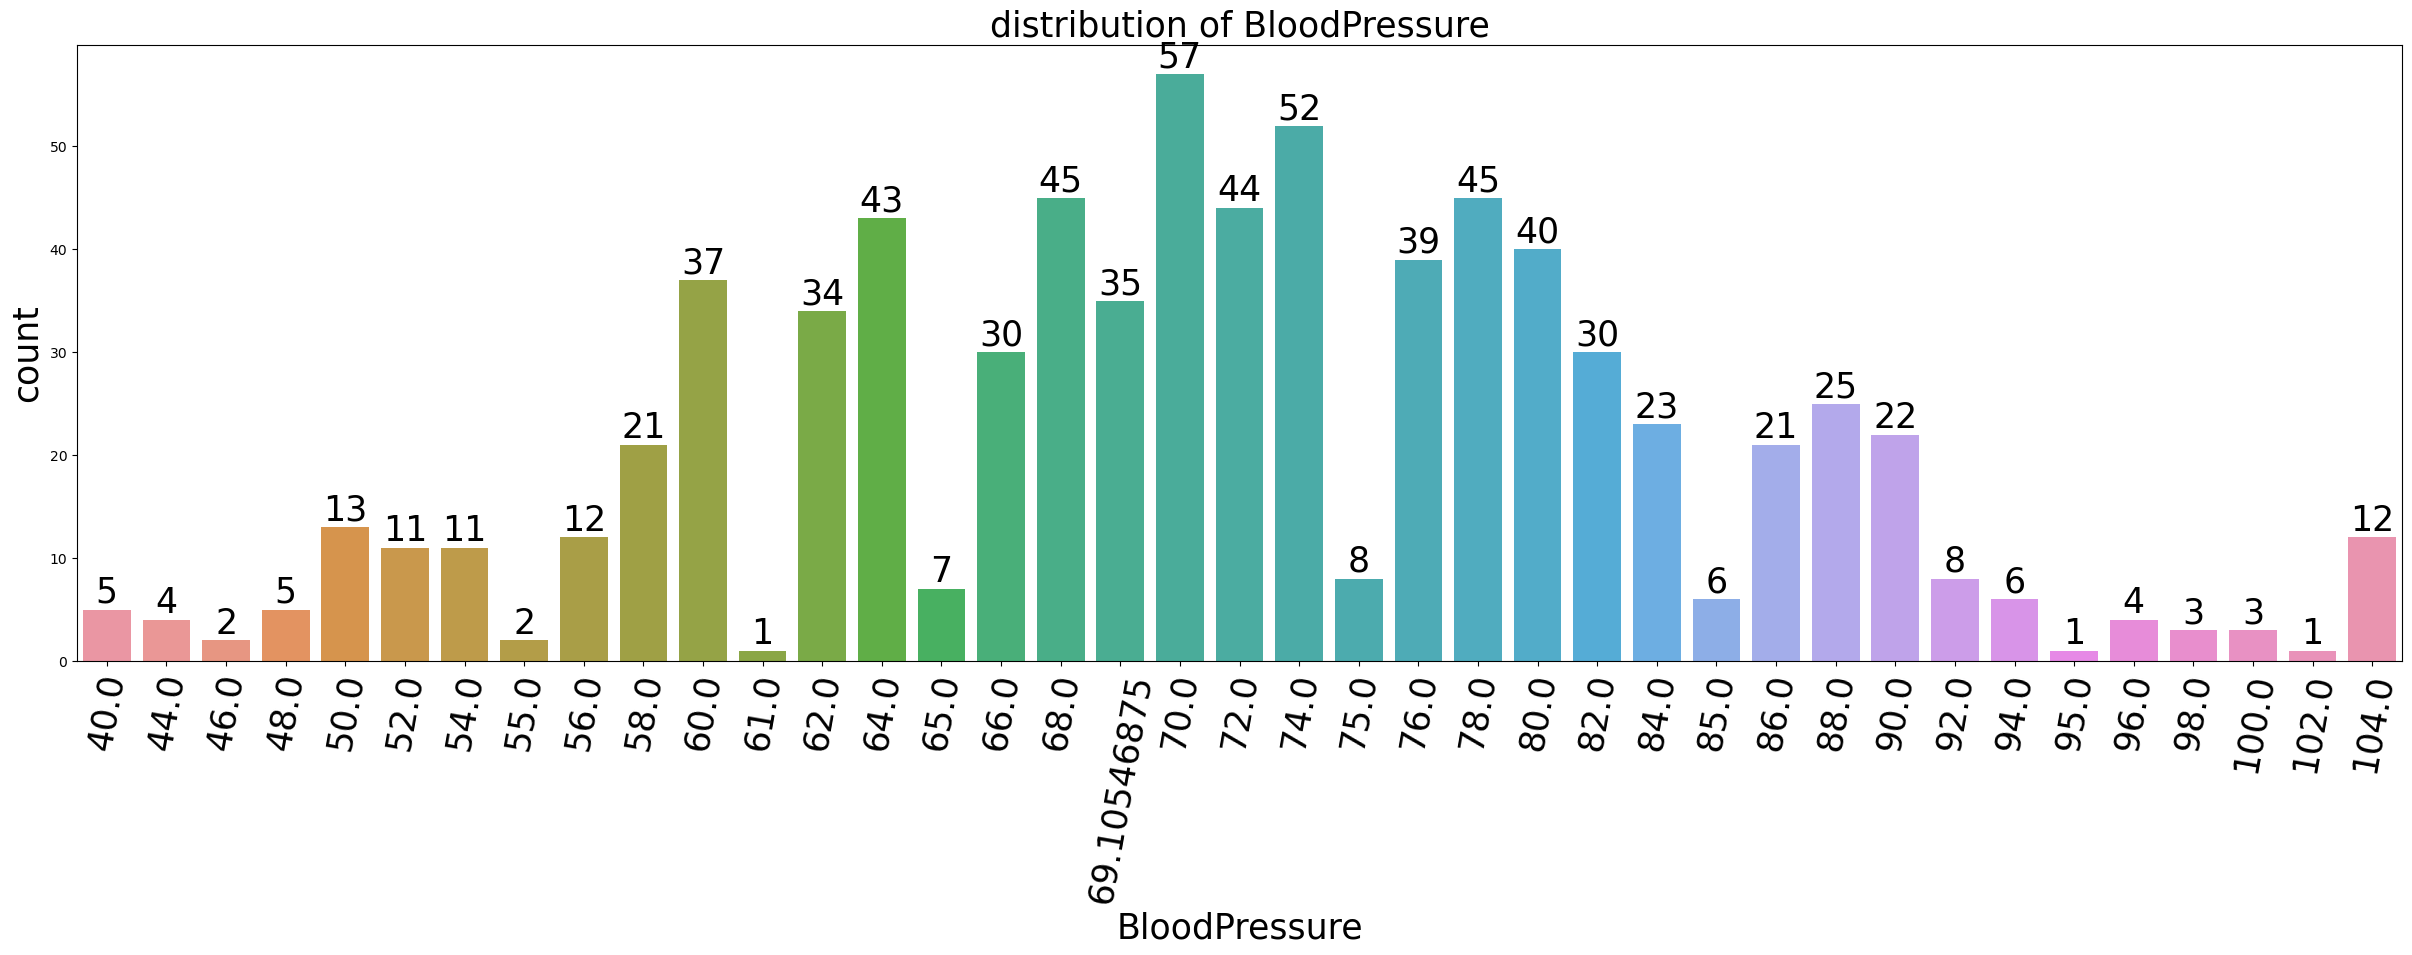

In [45]:
plt.figure(figsize=(30,8))
ax=sns.countplot(data=df2,x=df2.bloodpressure)
for bars in ax.containers:
    ax.bar_label(bars,size=25)
plt.title("distribution of BloodPressure",size=25)
plt.xlabel("BloodPressure",size=25)
plt.ylabel("count",size=25)
plt.xticks(rotation=80,size=25)
plt.show()

### 1.In this we can observe bloodpressure range from 40 to 104
### 2.57 peoples have the bloodpressure 70
### 3.Most of the people have bloodpressure range from 68 to 74
### 4.less no of the people have bloodpressure range from 40 to 61 and 85 to 104

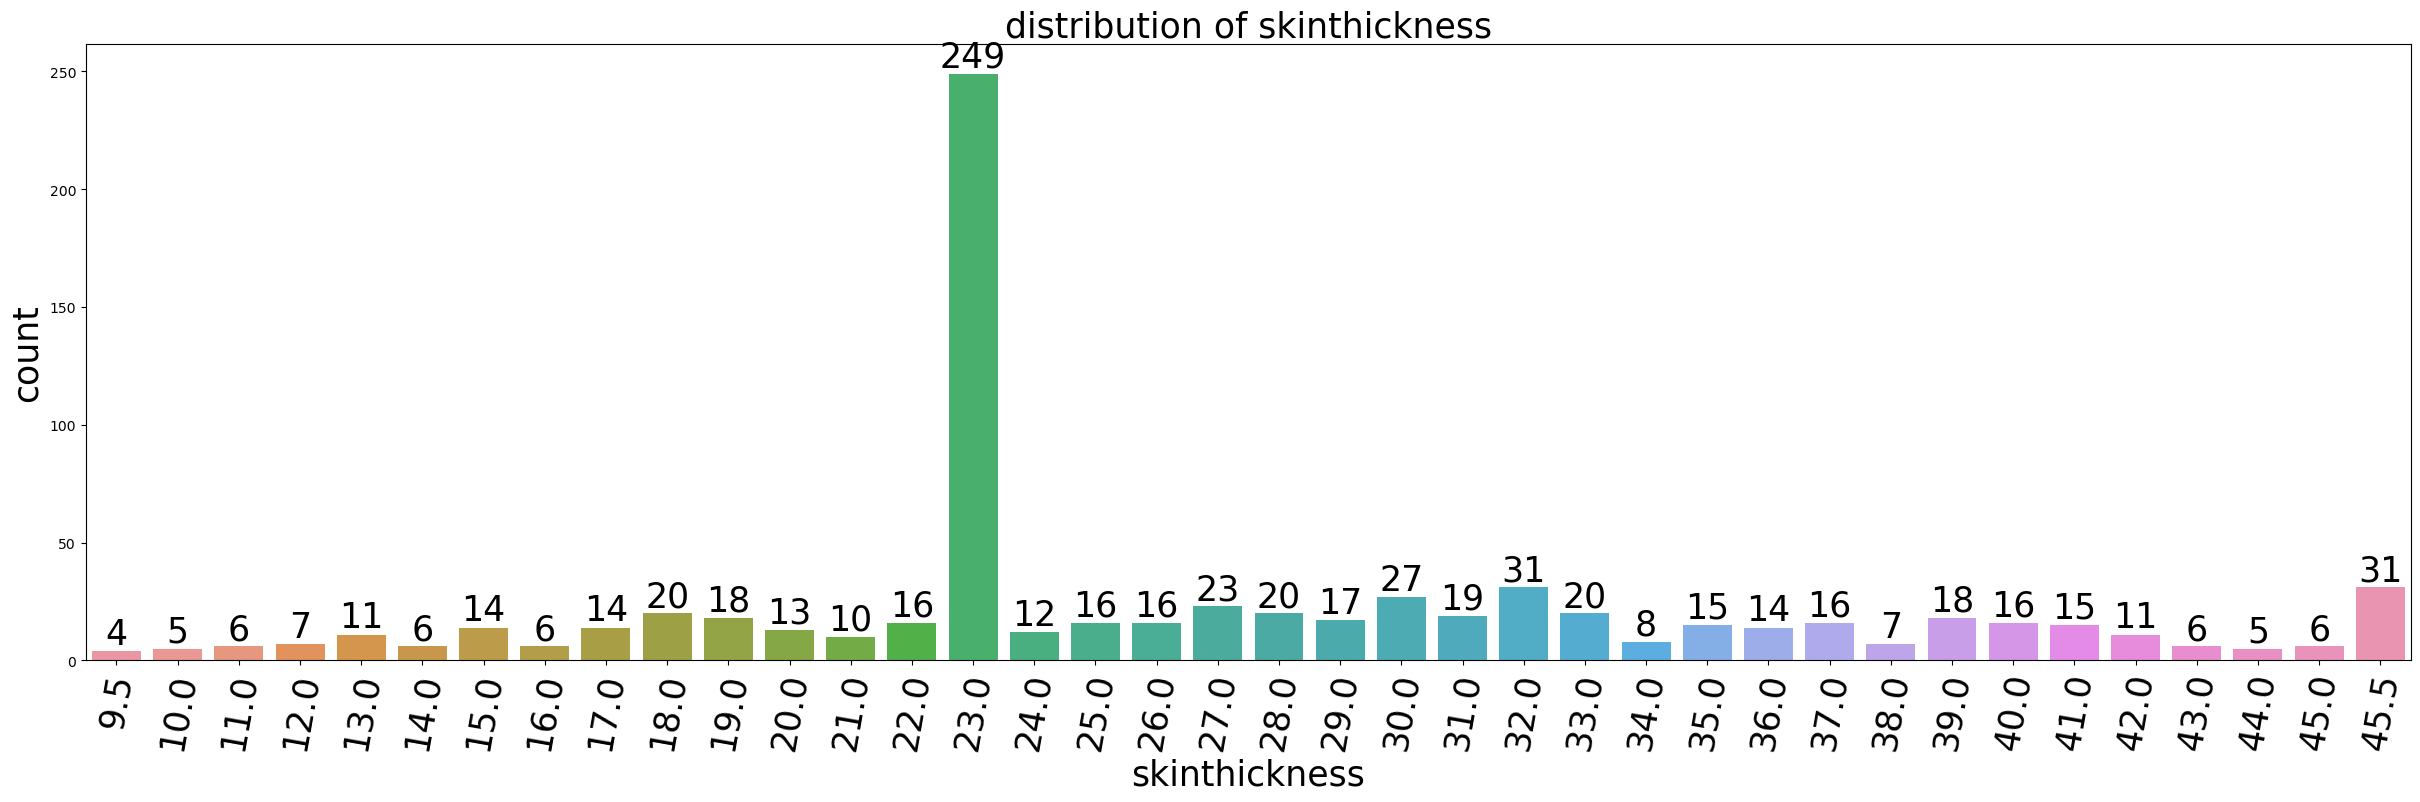

In [46]:
plt.figure(figsize=(30,8))
ax=sns.countplot(data=df2,x=df2.skinthickness)
for bars in ax.containers:
    ax.bar_label(bars,size=25)
plt.title("distribution of skinthickness",size=25)
plt.xlabel("skinthickness",size=25)
plt.ylabel("count",size=25)
plt.xticks(rotation=80,size=25)
plt.show()

### 1.In this "skinthickness in mm" Graph representation ,skinthickness range from 9.5 to 45.5
### 2.More people had skinthickness is 23mm
### 3. 249 people had 23mm skinthickness

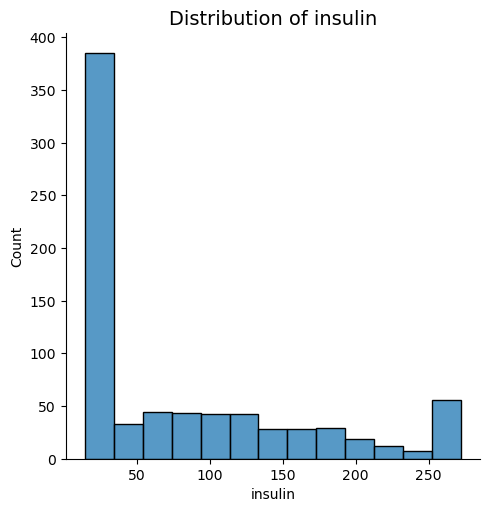

In [47]:
#distribution of insulin
sns.displot(df2,x='insulin')
plt.title("Distribution of insulin",size=14)
plt.show()

### 1.In this insulin range from 0 to 300
### 2.most of the people had the insulin range between 0 to 50

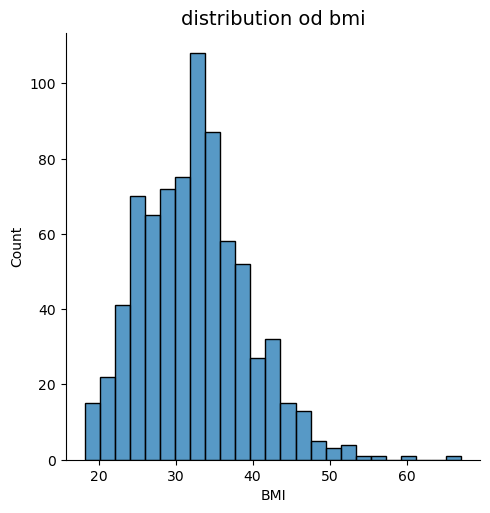

In [48]:
sns.displot(df,x='BMI')
plt.title('distribution od bmi',size=14)
plt.show()

### 1.according to the above graph representation BMI range from between 20 to 70
### 2. More people had the bmi from 25 to 35

In [49]:
df2.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'pedigree', 'age', 'has_diabete'],
      dtype='object')

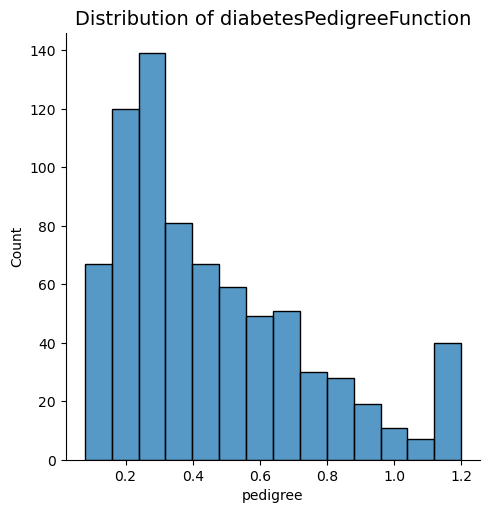

In [50]:
sns.displot(df2,x="pedigree")
plt.title("Distribution of diabetesPedigreeFunction",size=14)
plt.show()

### According to the above graph 
### 1.Diabetes Pedigree Function range from 0 to 1.2
### 2. and more people had the Diabetes Pedigree Function value from 0 to 0.4
### 3. 0.3,0.4 had the more people

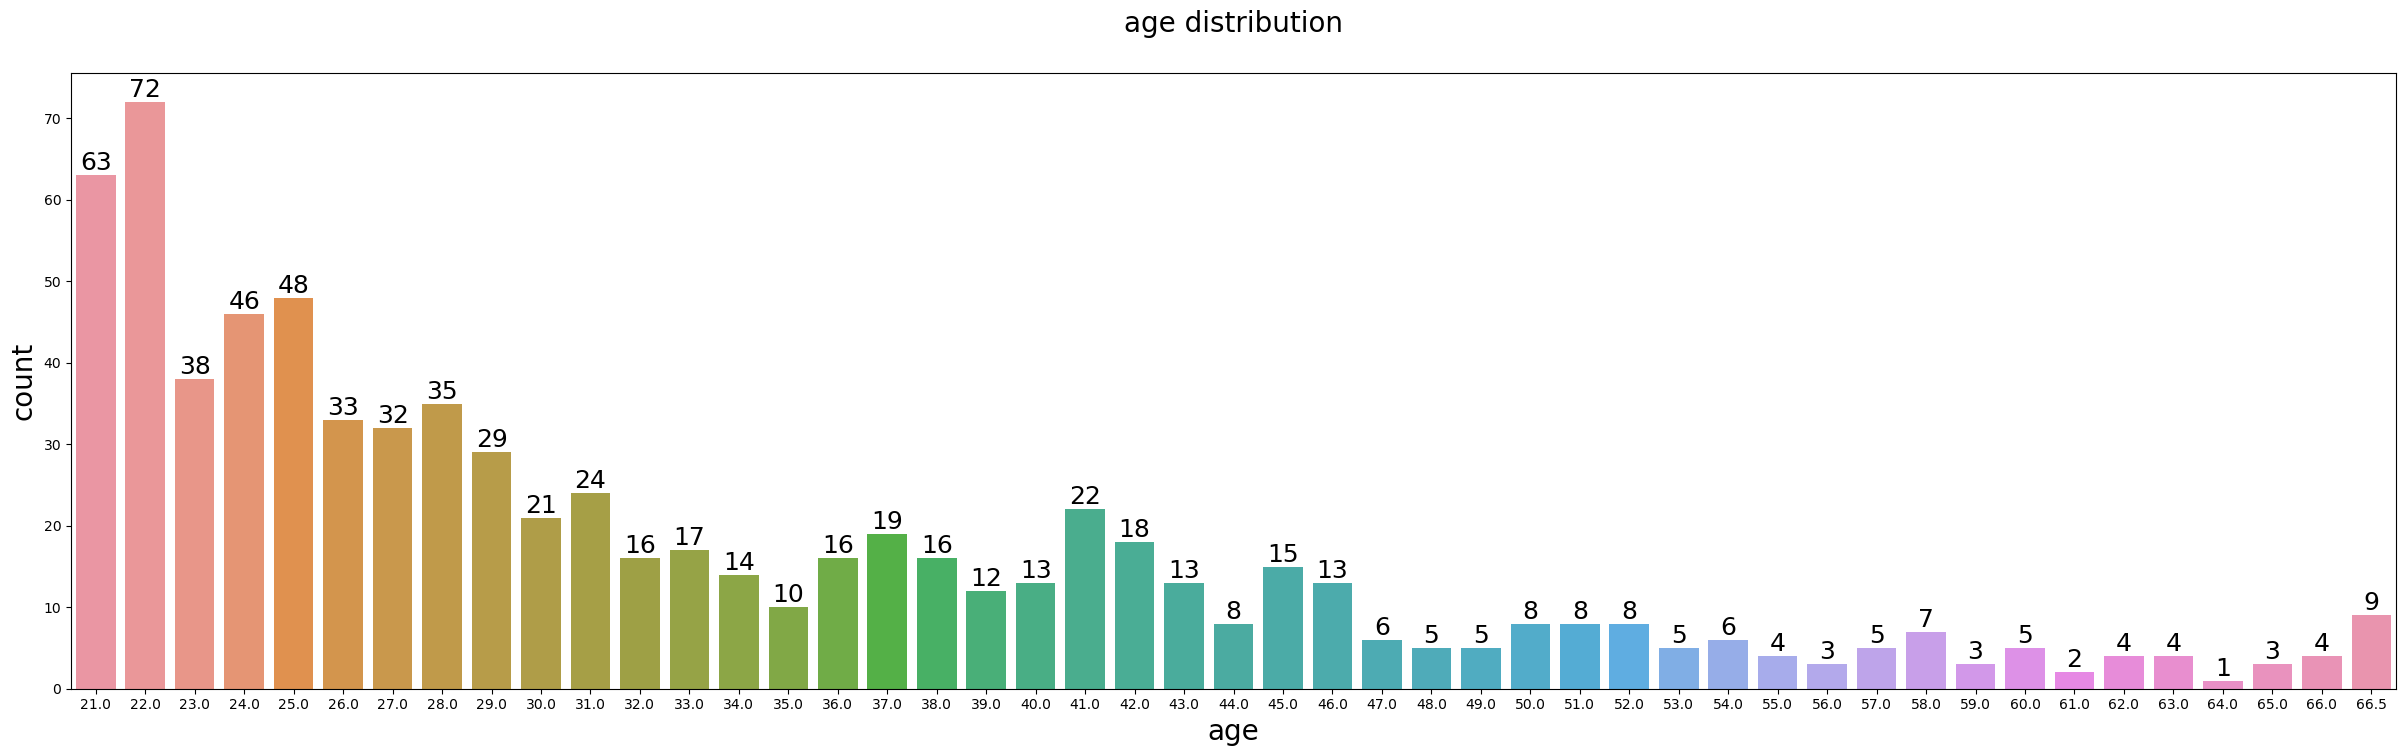

In [51]:
plt.figure(figsize=(30,8))
ax=sns.barplot(x=df2['age'].value_counts().index,y=df2['age'].value_counts())
for bars in ax.containers:
    ax.bar_label(bars,size=18)
plt.xlabel('age',size=20)
plt.ylabel('count',size=20)
plt.title('age distribution\n',size=20)
plt.show()

## Insights:
### 1. we can observe above graph,the age range from 21 to 66
### 2.In the given dataframe,the people who had age 22 are higher when compare to the remaing age people
### 3. 72 people had age 22 and followed 63 people had age 21
### 4.Less no people had age from 47 to 66

array([[<AxesSubplot:title={'center':'pregnancies'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'bloodpressure'}>],
       [<AxesSubplot:title={'center':'skinthickness'}>,
        <AxesSubplot:title={'center':'insulin'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'pedigree'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'has_diabete'}>]], dtype=object)

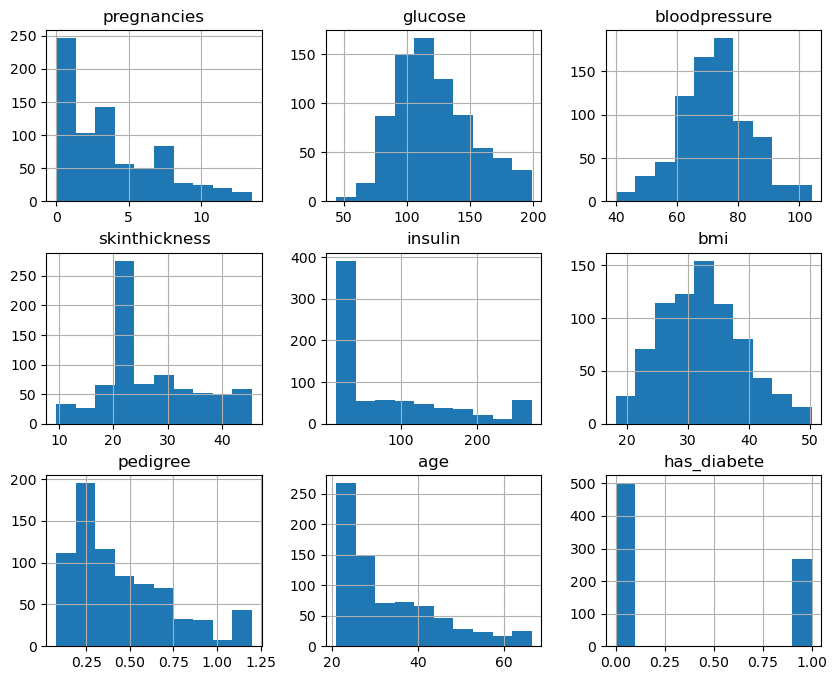

In [52]:
df2.hist(figsize=(10,8))

pregnancies         AxesSubplot(0.125,0.653529;0.227941x0.226471)
glucose          AxesSubplot(0.398529,0.653529;0.227941x0.226471)
bloodpressure    AxesSubplot(0.672059,0.653529;0.227941x0.226471)
skinthickness       AxesSubplot(0.125,0.381765;0.227941x0.226471)
insulin          AxesSubplot(0.398529,0.381765;0.227941x0.226471)
bmi              AxesSubplot(0.672059,0.381765;0.227941x0.226471)
pedigree                AxesSubplot(0.125,0.11;0.227941x0.226471)
age                  AxesSubplot(0.398529,0.11;0.227941x0.226471)
has_diabete          AxesSubplot(0.672059,0.11;0.227941x0.226471)
dtype: object

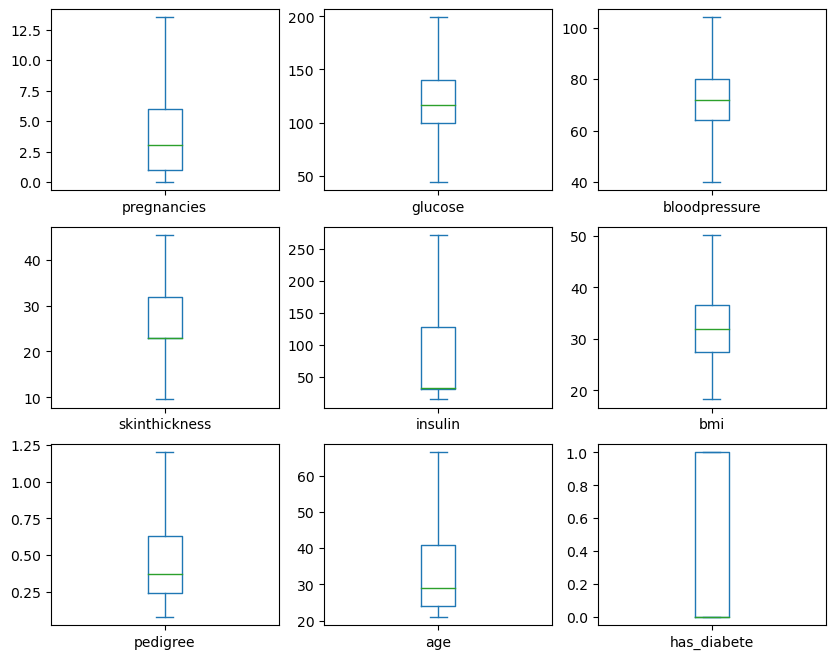

In [53]:
#checking outliers in dataframe
df2.plot(kind='box',subplots=True,layout=(3,3),sharex=False,sharey=False,figsize=(10,8))

In [54]:
df2.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'pedigree', 'age', 'has_diabete'],
      dtype='object')

## Age Vs Diabetes

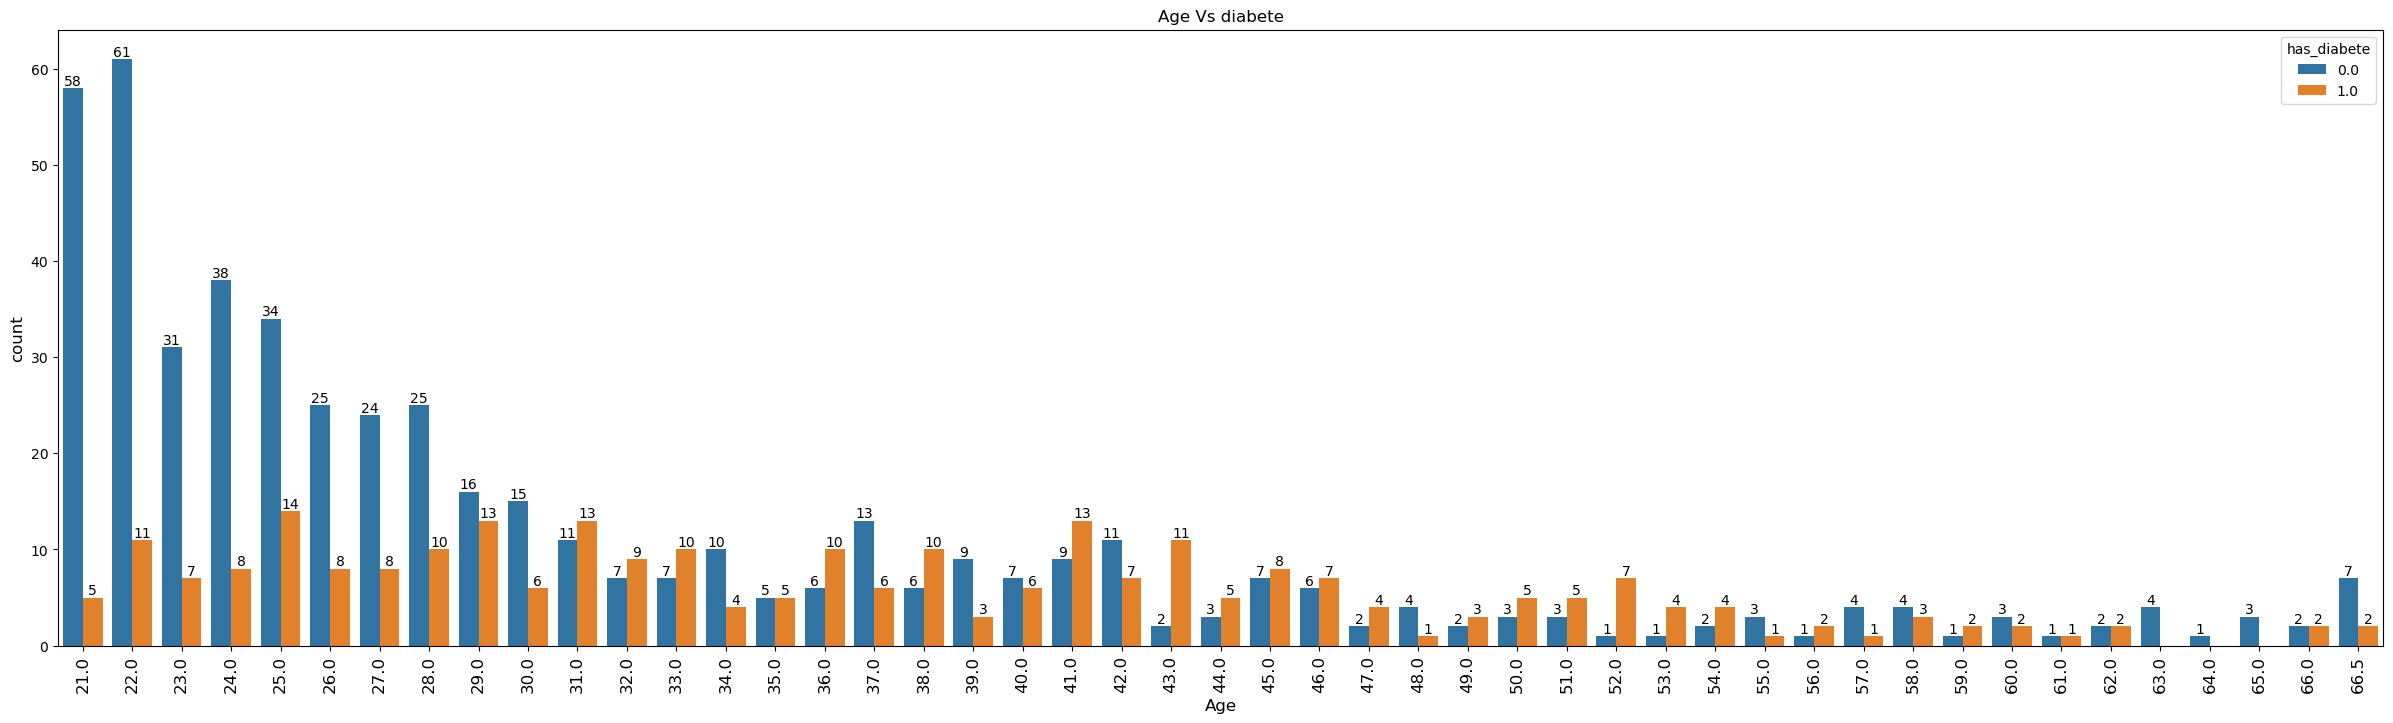

In [55]:
plt.figure(figsize=(30,8))
ax=sns.countplot(x=df2['age'],hue=df2['has_diabete'],data=df2)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Age',size=12)
plt.xticks(rotation=90,size=12)
plt.ylabel('count',size=12)
plt.title('Age Vs diabete',size=12)
plt.show()

## Insights:
### 1.The above graph represents relationship between age and diabetes outcome
### 2.Most of the people have the diabetes who had age is 41

## Pregnancies Vs Outcome


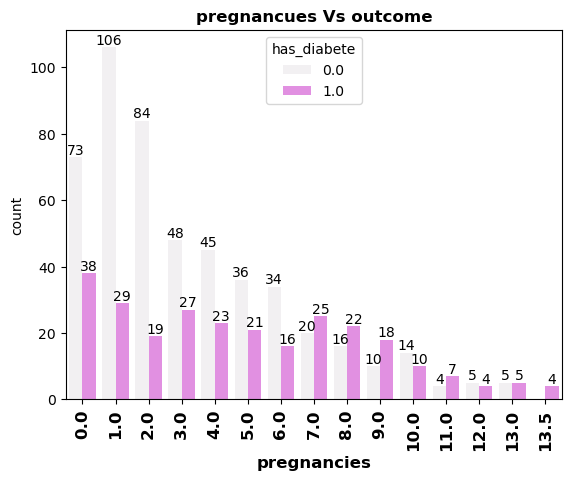

In [56]:
ax=sns.countplot(x=df2['pregnancies'],hue=df2['has_diabete'],data=df2,color='violet')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel("pregnancies",size=12,fontweight='bold')
plt.xticks(rotation=90,size=12,fontweight='bold')
plt.title("pregnancues Vs outcome",size=12,fontweight='bold')
plt.show()

## Insights:
### 1.according above graph we can observe most of the people had diabetes who had got pregnancie at 0 followed by 1 times

In [57]:
df2.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'pedigree', 'age', 'has_diabete'],
      dtype='object')

## BloodPressure Vs Outcome


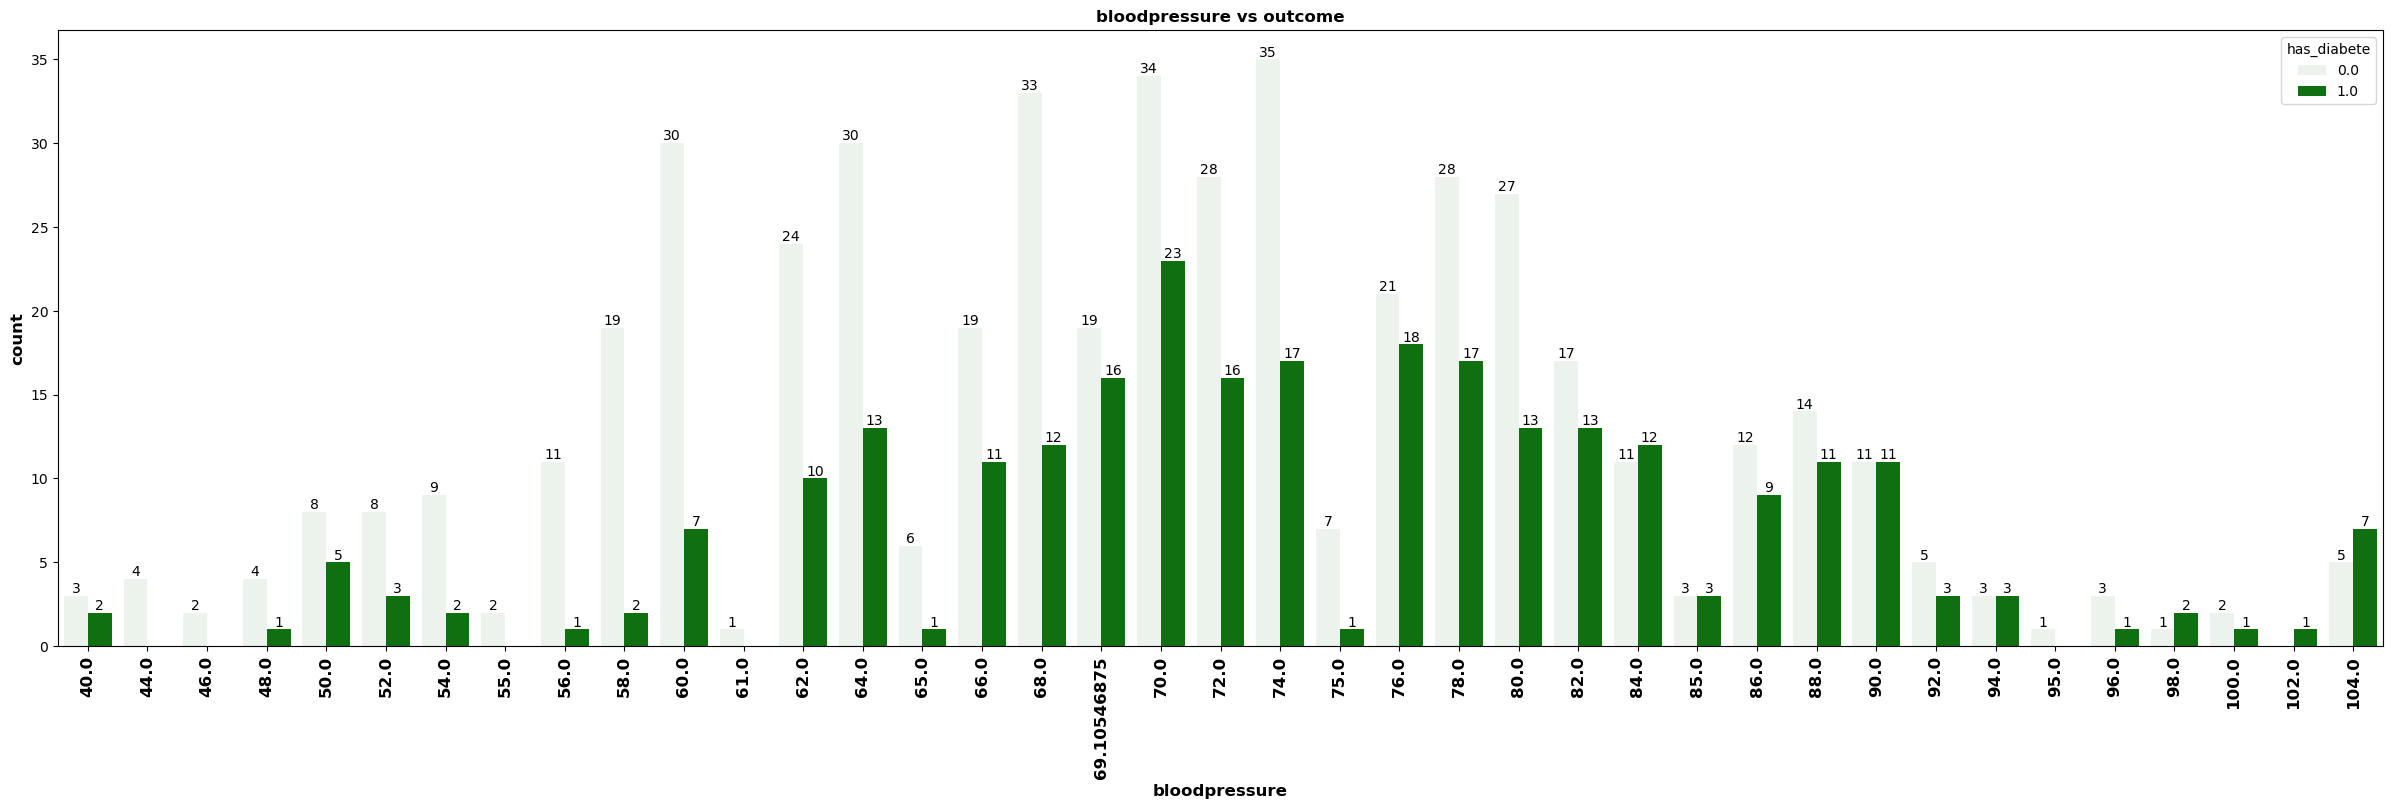

In [58]:
plt.figure(figsize=(30,8))
ax=sns.countplot(x=df2['bloodpressure'],hue=df2['has_diabete'],data=df2,color='green')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel("bloodpressure",size=12,fontweight='bold')
plt.xticks(rotation=90,size=12,fontweight='bold')
plt.ylabel("count",size=12,fontweight='bold')
plt.title("bloodpressure vs outcome",size=12,fontweight='bold')
plt.show()

### according to graph
### most of the people had diabetes who had bloodpressure is 70 when compare to remianing

## Skin Vs Outcome

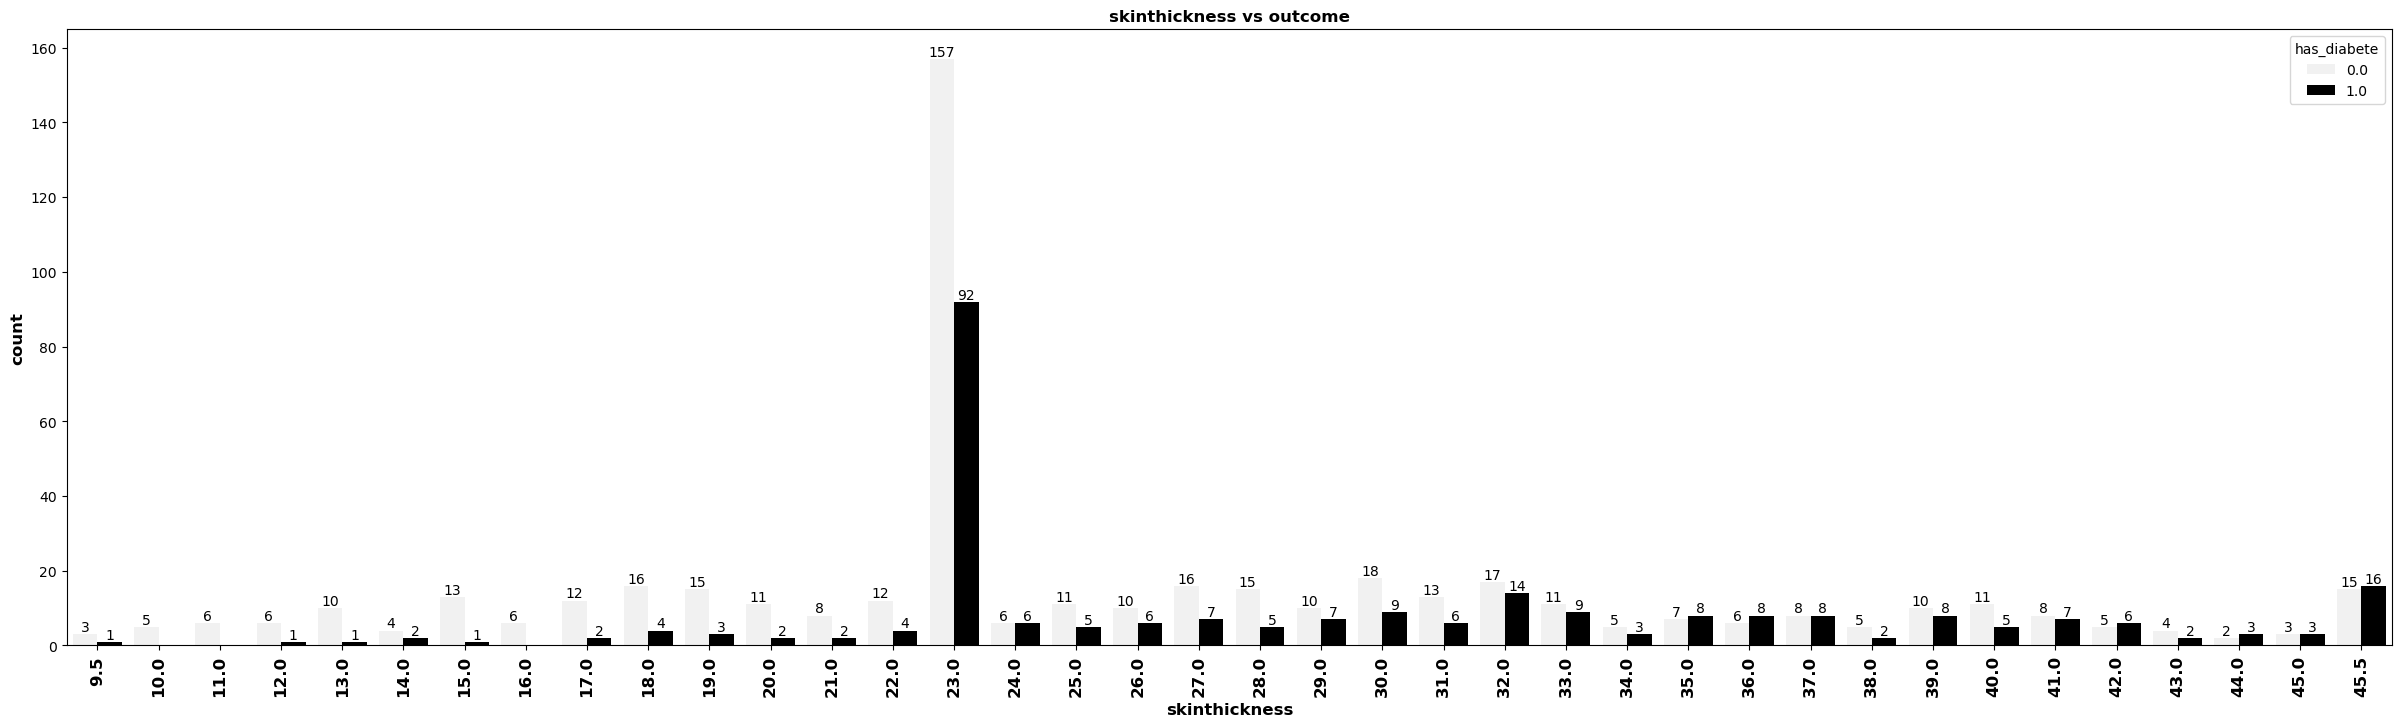

In [59]:
plt.figure(figsize=(30,8))
ax=sns.countplot(x=df2['skinthickness'],hue=df2['has_diabete'],data=df2,color='black')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel("skinthickness",size=12,fontweight='bold')
plt.xticks(rotation=90,size=12,fontweight='bold')
plt.ylabel("count",size=12,fontweight='bold')
plt.title("skinthickness vs outcome",size=12,fontweight='bold')
plt.show()

### The above graph represent the relationship between skinthickness and outcome
### more people had diabete which had the skinthickness is 23mm followed by 45.5mm

In [60]:
df2.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'pedigree', 'age', 'has_diabete'],
      dtype='object')

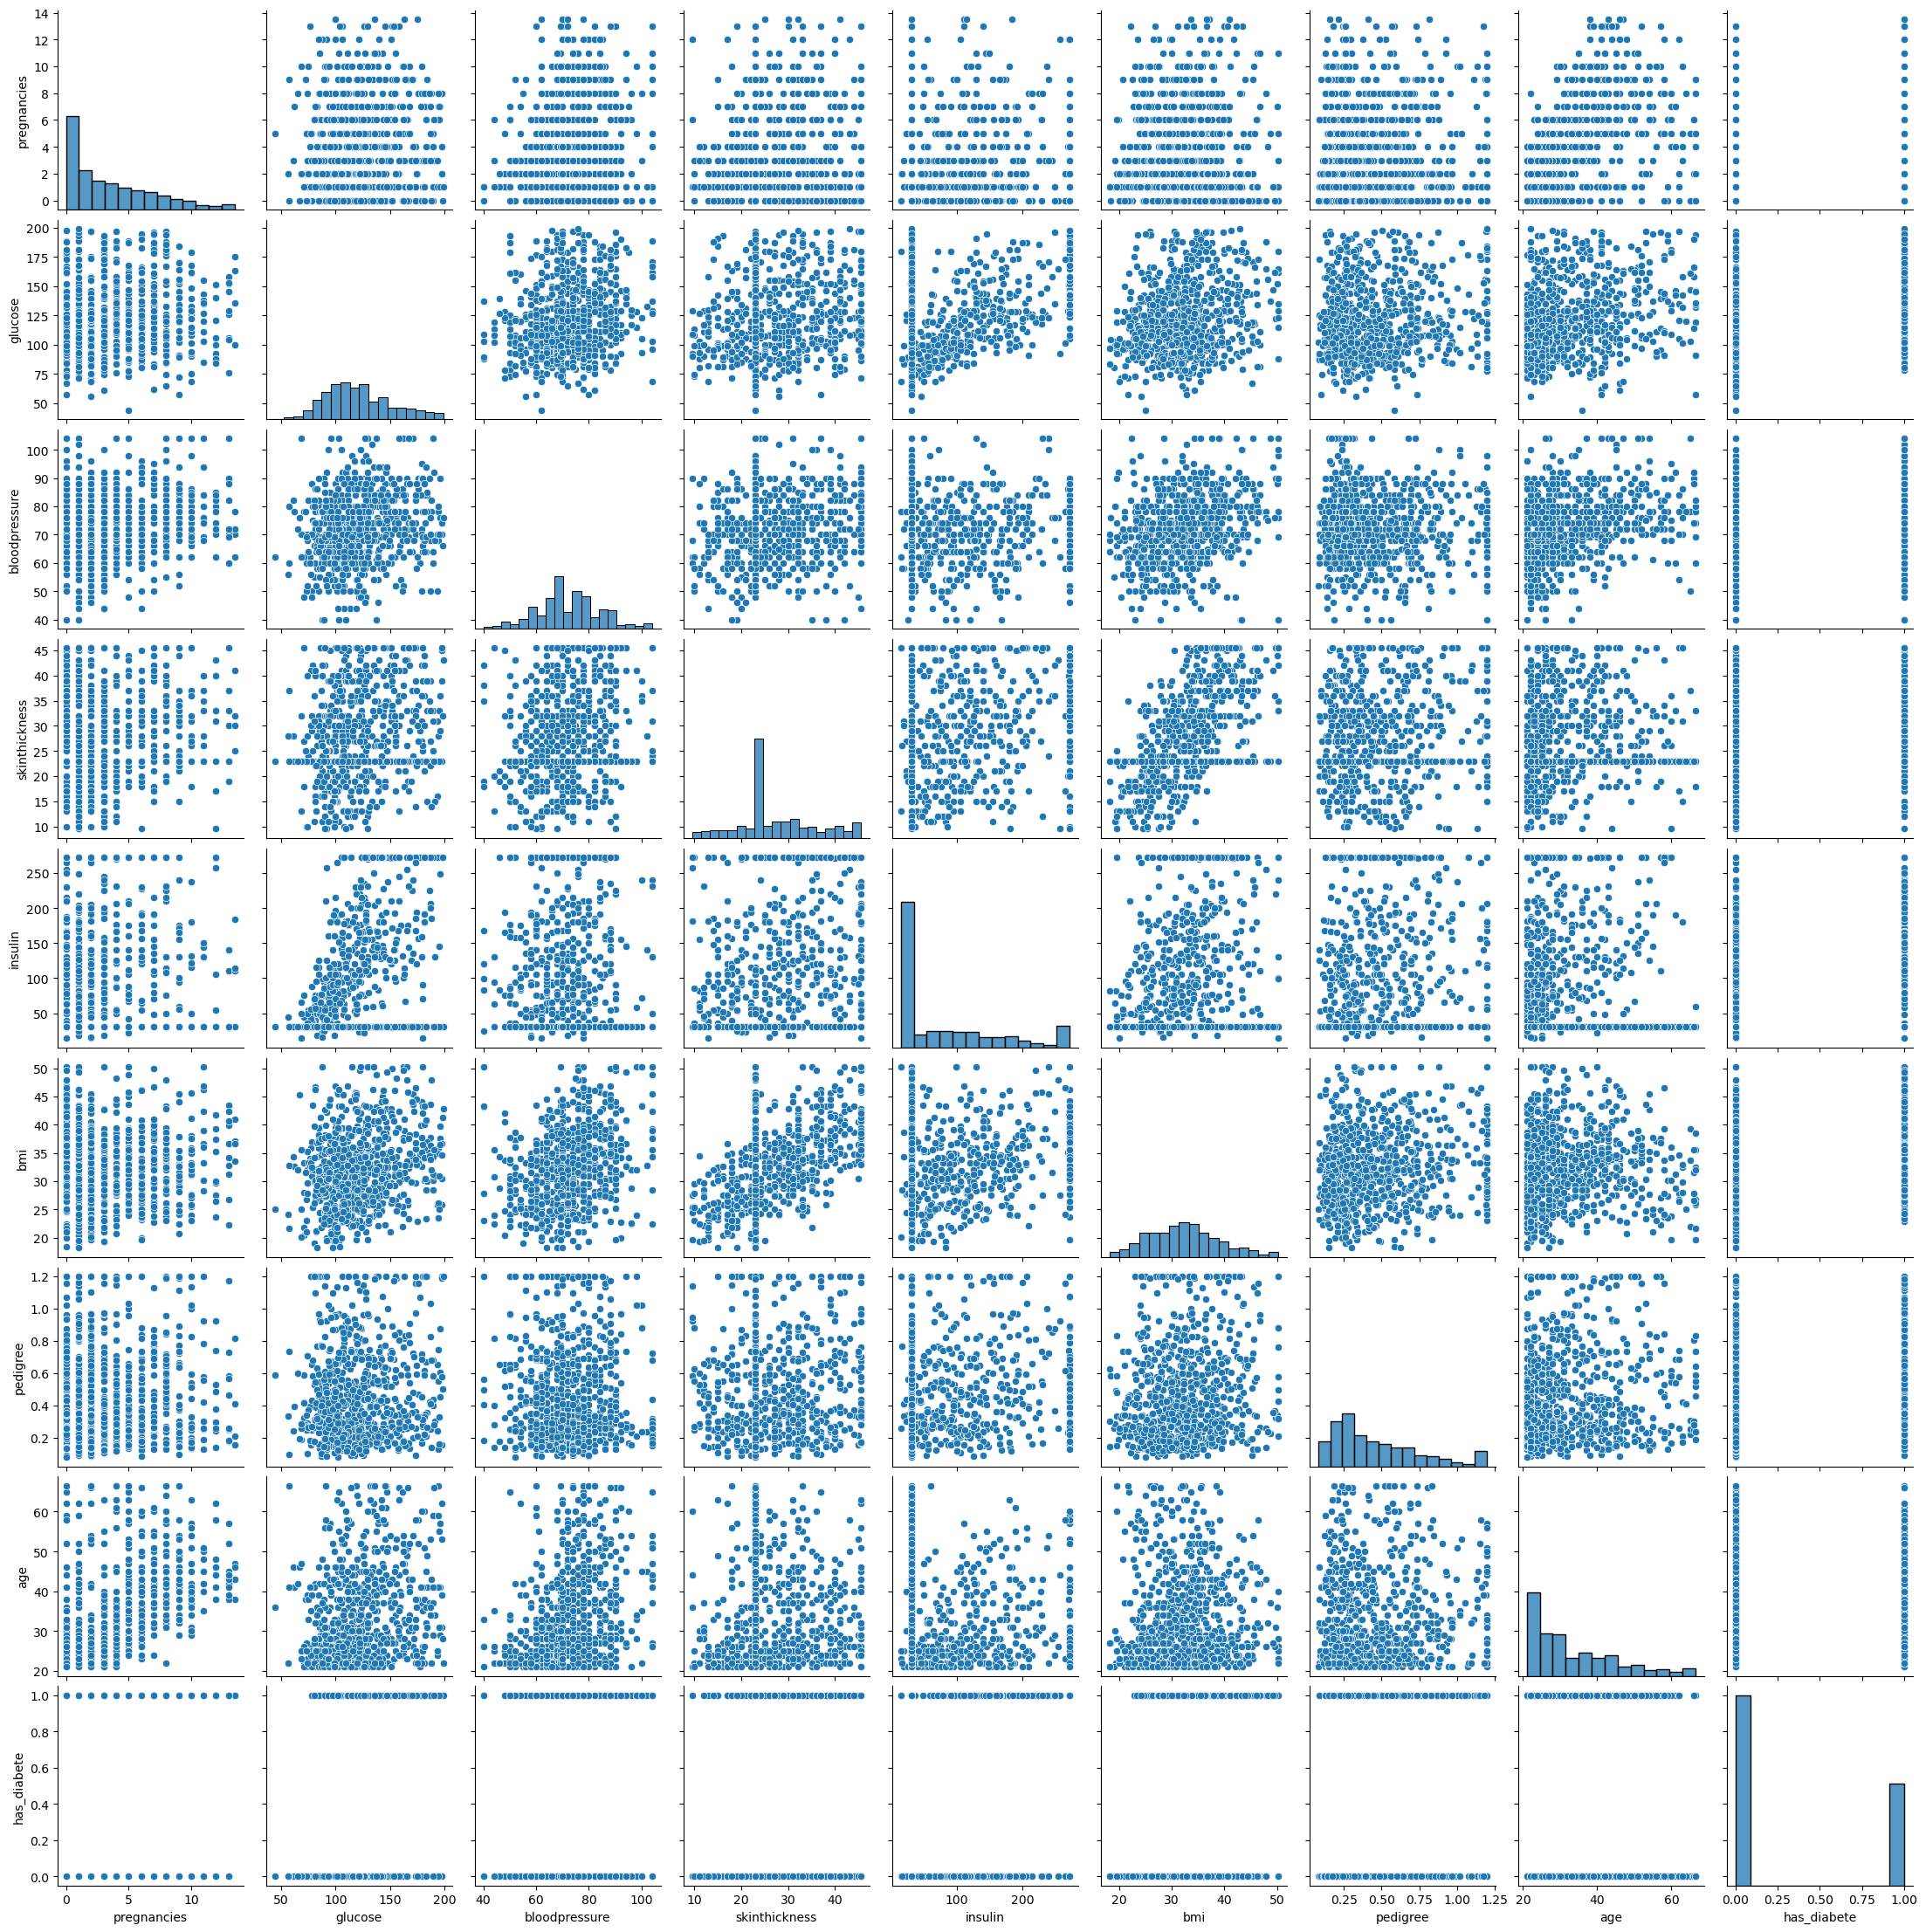

In [61]:
sns.pairplot(df2)

In [62]:
corr=df2.corr()
corr

pregnancies   glucose  bloodpressure  skinthickness   insulin  \
pregnancies       1.000000  0.126606       0.211257       0.047563 -0.061192   
glucose           0.126606  1.000000       0.220946       0.162287  0.337830   
bloodpressure     0.211257  0.220946       1.000000       0.164741 -0.025568   
skinthickness     0.047563  0.162287       0.164741       1.000000  0.285411   
insulin          -0.061192  0.337830      -0.025568       0.285411  1.000000   
bmi               0.027144  0.234041       0.286508       0.562506  0.207484   
pedigree         -0.017398  0.118236       0.015067       0.118426  0.191870   
age               0.549695  0.268602       0.334903       0.045434 -0.040448   
has_diabete       0.220392  0.492908       0.166131       0.191333  0.147295   

                    bmi  pedigree       age  has_diabete  
pregnancies    0.027144 -0.017398  0.549695     0.220392  
glucose        0.234041  0.118236  0.268602     0.492908  
bloodpressure  0.286508  0.015067  0.334903     0.166131  
skinthickness  0.562506  0.118426  0.045434     0.191333  
insulin        0.207484  0.191870 -0.040448     0.147295  
bmi            1.000000  0.138545  0.035865     0.313035  
pedigree       0.138545  1.000000  0.047289     0.184969  
age            0.035865  0.047289  1.000000     0.242702  
has_diabete    0.313035  0.184969  0.242702     1.000000

<AxesSubplot:>

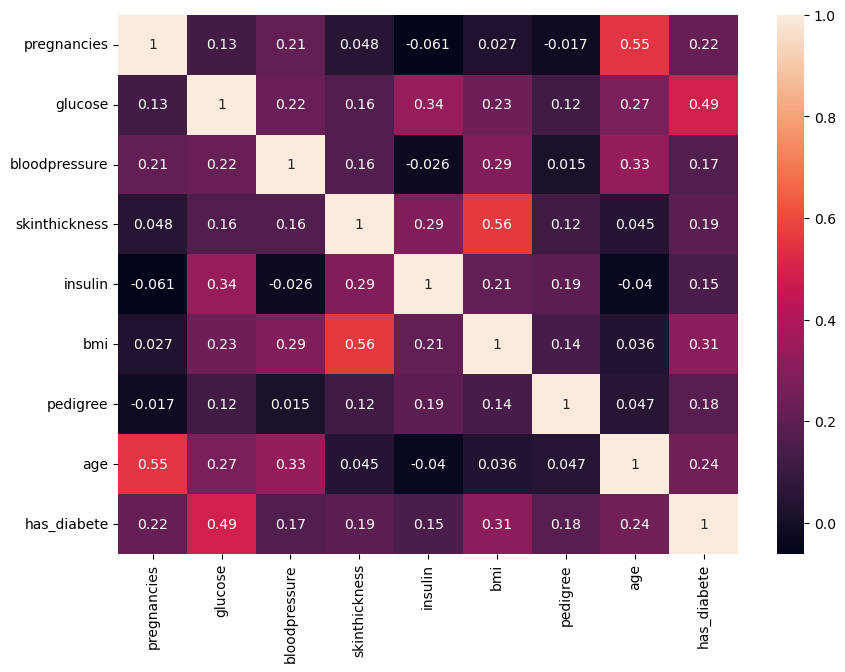

In [63]:
plt.figure(figsize=(10,7))
sns.heatmap(data=df2_corr, annot=True)

## Insights:
### 1.bmi feature highly correlated with skinthickness which is 0.56
### 2.pregnancies and age correlation value is 0.55
### 3.insulin had negative correlation with preganancies,bloodpressure and age